# Konkurs
Zadaniem konkursu jest tak zwany [skoring kredytowy](https://pl.wikipedia.org/wiki/Scoring_kredytowy) (ang. `credit_score`). Są dane historyczne klientów i na podstawie tych danych należy stwierdzić czy warto dawać kredyt klientowi czy nie.

Metryka sukcesu będzie: AUC.

## Kaggle
Konkurs będzie dostępny na Kaggle - [link do konkursu](https://www.kaggle.com/t/5007f8f6f6e548348b8633146ca651d7).

### Rejestracja
Jak jeszcze nie masz konta na Kaggle, to proszę [założ](https://www.kaggle.com/account/register). Pod czas rejestracji jest wymagane potwierdzenie SMS. Zawsze na moich poprzednich warsztatach było 1-2 osoby, które pod żadnym argumentem nie chcieli dawać swój telefon. Jeśli nie chcesz, to OK... w takim razie możesz wykonać zadanie tylko w noteeboki (jako zadanie domowe). Uczenstnicwo w konkursie jest opcjonalne. Z drugiej strony, Kaggle to jest największa społeczność uczenia maszynowego na świecie. Dlatego jeśli chcesz tym zająć się napoważniej, inspirować się od innych lub czas od czasu brać udział na Kaggle - to polecam założyć konto na Kaggle.

## Regułamin
1. Konkurs rozpoczyna się w poniedziałek, **13 listopada** i kończy się w niedziele, **19 listopada 23:59**.
2. Osoba która będzie na pierwszym miejscu dostaje nagrodę - Google Home.
3. Miejsca będą widoczne na [Leader Board](https://www.kaggle.com/c/dataworkshop-credit-score/leaderboard) przez cały czas.
4. Zbiór danych został podzielony na dwie części: publiczny i prywatny. Publiczy zbiór danych zawiera cech + odpowiedź, prywatny zbiór tyko cechę. Należy zrobić predykcję na prywatnym zbiorze i wysłać na Kaggle. Wtedy jak skończy się konkurs, ostateczny wynik będzie robiony na zbiorze prywatnym.
5. Każdy uczestnik może dodawać (`submit`) do 5 prób rozwiazań.
6. Osoba która wygrała opublikuje swoje rozwiązanie dla wszystkich i udostępni go podając link na slacku.
7. Nagroda będzie wysłana do 2 tygodni (i na pewno powinna przyjść przed końcem konkursu).

## Nagroda
![Google Home](../images/google_home.jpg)

In [6]:
import pandas as pd
import numpy as np

from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn.dummy import DummyClassifier

## Dane

**Uwaga**. To są prawdziwe danne, dlatego część informacji jest nieznana (schowana) lub niejasna (jak magiczny kod itd). Dane można używać tylko w celach edukacyjnych!

- **customer_id** - ID klienta
- **b_id** - ID nieznane
- **b_request_date** - data czegość
- **date_confirmed** - data potwierdzenia
- **contract_type** - rodzaj umowy
- **contract_status** - status umowy
- **conract_open_date** - data podpisanie umowy
- **final_payment_date** - data ostatnie raty
- **real_date_closed_account** - faktyczna data zamknięcia konta
- **cred_limit** - limit kredytu
- **cur** - waluta
- **cur_debt** - bieżący dług
- **next_payment** - następna opłata
- **cur_balance** - balnas
- **duration_debt_days** - spóźnieni opłaty (w dniach)
- **cnt_delay_upto_5d** - ile razy spóźniony do 5 dni
- **cnt_delay_5d_29d** - ile razy spóźniony od 5 do 29 dni
- **cnt_delay_upto_30d** - ile razy spóźniony do 30 dni
- **cnt_delay_30d_59d** - ile razy spóźniony od 30 do 59 dni
- **cnt_delay_60d_89d** - ile razy spóźniony od 60 do 89 dni
- **cnt_delay_upto_90d** - ile razy spóźniony ponad 90 dni
- **str_start** - kod magicznej liczby
- **trustability_code** - zaszyfrowana wiarygodnosć klienta
- **cur_overdue_debt** - obecny dług
- **max_amount_debt** - maksymalny dług
- **interest_rate_loan** - stopa procentowa
- **code_frequency_payments** - kod płacenia
- **code_relationship_contract** - rodzaj relacji umowy
- **is_bad** - dobry czy zły klient :). To jest zmienna docelowa.

In [7]:
train = pd.read_hdf('../input/train.credit_score.h5')
test = pd.read_hdf('../input/test.credit_score.h5') #zbiór testowy bez odpowiedzi

In [8]:
train.head()

,customer_id,b_id,b_request_date,date_confirmed,contract_type,contract_status,conract_open_date,final_payment_date,real_date_closed_account,cred_limit,...,cnt_delay_60d_89d,cnt_delay_upto_90d,str_start,trustability_code,cur_overdue_debt,max_amount_debt,interest_rate_loan,code_frequency_payments,code_relationship_contract,is_bad
0,14886,2,40575,40518,9,13,34004,36926.0,38798,5000,...,0,0,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,0,0,24,4,1,0.0
1,13016,2,40667,40588,6,13,35550,39202.0,39166,10000000,...,0,0,39120.0,X111111111111111111111111111111111111111111111...,0,0,24,3,1,0.0
2,498,2,40578,39809,99,52,36343,NaN,NaN,0,...,0,11,39743.0,XXXXXXXXXXXXXXXXXXXXXXXXXXXX5XXXXXXXXXXXXXX55X...,"1506,58","1506,58",0,7,1,0.0
3,1388,2,40592,39987,7,0,36344,40019.0,NaN,39831,...,0,0,40592.0,XXXXXXXXXXXXXXXXXXXX111XXXX1111X1111X1XX11XXXX...,0,0,0,7,1,0.0
4,25706,2,40564,39672,99,52,36345,NaN,NaN,0,...,0,3,40564.0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXX5XXXXXXXXXXXX55XX...,"3151,55","3151,55",0,7,1,0.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165454 entries, 0 to 193337
Data columns (total 29 columns):
customer_id                   165454 non-null int64
b_id                          165454 non-null int64
b_request_date                165454 non-null int64
date_confirmed                165454 non-null int64
contract_type                 165454 non-null int64
contract_status               165454 non-null int64
conract_open_date             165454 non-null int64
final_payment_date            154608 non-null float64
real_date_closed_account      80967 non-null object
cred_limit                    165454 non-null int64
cur                           165454 non-null int64
cur_debt                      133575 non-null object
next_payment                  75088 non-null object
cur_balance                   60343 non-null float64
duration_debt_days            134129 non-null float64
cnt_delay_upto_5d             165454 non-null int64
cnt_delay_5d_29d              165454 non-null int64

In [10]:
train.describe()

,customer_id,b_id,b_request_date,date_confirmed,contract_type,contract_status,conract_open_date,final_payment_date,cred_limit,cur,...,cnt_delay_upto_5d,cnt_delay_5d_29d,cnt_delay_upto_30d,cnt_delay_30d_59d,cnt_delay_60d_89d,cnt_delay_upto_90d,str_start,interest_rate_loan,code_relationship_contract,is_bad
count,165454.000000,165454.000000,165454.000000,165454.000000,165454.000000,165454.000000,165454.000000,154608.000000,1.654540e+05,165454.000000,...,165454.000000,165454.000000,165454.000000,165454.000000,165454.000000,165454.000000,156049.000000,165454.000000,165454.000000,165454.000000
mean,13001.331905,1.970312,40575.131197,40247.581086,17.048594,9.549464,39788.845359,41498.916382,7.306773e+04,0.004557,...,0.168361,0.555683,0.724038,0.200962,0.088617,0.514070,40231.830918,1.579635,1.014439,0.100832
std,9016.160876,0.870767,55.191566,450.254410,26.608616,12.541128,616.779313,5636.283878,3.473047e+05,0.072953,...,0.855932,1.633571,2.050994,0.770255,0.425695,3.218355,478.599639,5.717720,0.268530,0.301107
min,0.000000,1.000000,40427.000000,38356.000000,1.000000,0.000000,34004.000000,63.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37935.000000,0.000000,1.000000,0.000000
25%,5296.000000,1.000000,40529.000000,40079.000000,9.000000,0.000000,39292.000000,39841.000000,9.741250e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40023.000000,0.000000,1.000000,0.000000
50%,11558.500000,2.000000,40575.000000,40465.000000,9.000000,13.000000,39950.000000,40483.000000,2.231700e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40474.000000,0.000000,1.000000,0.000000
75%,19632.000000,3.000000,40621.000000,40553.000000,9.000000,13.000000,40338.000000,41059.000000,5.449600e+04,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40562.000000,0.000000,1.000000,0.000000
max,35030.000000,3.000000,40725.000000,40720.000000,99.000000,61.000000,40702.000000,771529.000000,5.545522e+07,3.000000,...,26.000000,44.000000,58.000000,42.000000,27.000000,149.000000,40725.000000,228.000000,9.000000,1.000000


In [11]:
train.corr()

,customer_id,b_id,b_request_date,date_confirmed,contract_type,contract_status,conract_open_date,final_payment_date,cred_limit,cur,...,cnt_delay_upto_5d,cnt_delay_5d_29d,cnt_delay_upto_30d,cnt_delay_30d_59d,cnt_delay_60d_89d,cnt_delay_upto_90d,str_start,interest_rate_loan,code_relationship_contract,is_bad
customer_id,1.000000,-0.041869,-0.008261,0.037008,0.037444,0.013335,0.030592,-0.017984,-0.006089,0.002593,...,-0.015559,0.008941,0.000631,0.015218,0.021648,0.028581,0.031686,0.028695,0.000436,0.037997
b_id,-0.041869,1.000000,-0.002270,0.132941,-0.276157,-0.009543,0.034349,0.130167,0.047149,0.026867,...,-0.219187,-0.059645,-0.138975,-0.015588,0.010913,0.061527,0.115527,0.009419,0.044793,-0.019703
b_request_date,-0.008261,-0.002270,1.000000,0.117835,0.000919,0.012057,0.086456,0.006730,-0.003028,-0.006461,...,0.001156,0.000144,0.000596,0.000468,0.005633,0.006714,0.109607,0.002310,-0.006564,0.001843
date_confirmed,0.037008,0.132941,0.117835,1.000000,0.017707,-0.154359,0.672779,0.203475,0.055845,-0.016193,...,0.001946,0.040892,0.033380,-0.061265,-0.049681,0.011138,0.862528,0.150541,-0.003790,0.032718
contract_type,0.037444,-0.276157,0.000919,0.017707,1.000000,0.013833,0.095212,-0.078208,-0.039338,-0.020642,...,-0.023608,-0.044378,-0.045198,-0.000237,-0.016911,-0.006809,0.022677,-0.075806,-0.017556,0.016275
contract_status,0.013335,-0.009543,0.012057,-0.154359,0.013833,1.000000,-0.227995,-0.097671,-0.042413,-0.003728,...,0.027259,0.190131,0.162801,0.204865,0.208426,0.268180,-0.162535,-0.044636,-0.010737,0.016864
conract_open_date,0.030592,0.034349,0.086456,0.672779,0.095212,-0.227995,1.000000,0.098275,-0.008157,-0.068253,...,-0.073281,-0.109182,-0.117539,-0.172032,-0.146967,-0.157410,0.705822,-0.058778,-0.013056,0.074196
final_payment_date,-0.017984,0.130167,0.006730,0.203475,-0.078208,-0.097671,0.098275,1.000000,0.028929,0.002721,...,-0.017873,0.046266,0.030670,-0.010858,-0.005814,0.003926,0.201477,-0.021880,0.007255,-0.003488
cred_limit,-0.006089,0.047149,-0.003028,0.055845,-0.039338,-0.042413,-0.008157,0.028929,1.000000,0.224968,...,0.005930,0.000100,0.002552,-0.009237,-0.008417,-0.008521,0.051206,0.045414,0.143650,-0.019828
cur,0.002593,0.026867,-0.006461,-0.016193,-0.020642,-0.003728,-0.068253,0.002721,0.224968,1.000000,...,0.011717,0.006695,0.010223,0.000481,0.000814,-0.001097,-0.019030,-0.005275,0.023483,-0.015966


# 0.  Prepare Dataset

## 0.1 Optimize memory

Check maximum for each int64 numeric column.

In [65]:
train.dtypes

customer_id                     int64
b_id                            int64
b_request_date                  int64
date_confirmed                  int64
contract_type                   int64
contract_status                 int64
conract_open_date               int64
final_payment_date            float64
real_date_closed_account       object
cred_limit                      int64
cur                             int64
cur_debt                       object
next_payment                   object
cur_balance                   float64
duration_debt_days            float64
cnt_delay_upto_5d               int64
cnt_delay_5d_29d                int64
cnt_delay_upto_30d              int64
cnt_delay_30d_59d               int64
cnt_delay_60d_89d               int64
cnt_delay_upto_90d              int64
str_start                     float64
trustability_code              object
cur_overdue_debt               object
max_amount_debt                object
interest_rate_loan              int64
code_frequen

In [66]:
ind = train.dtypes == 'int64'  
for col in train.columns[ind]:
    z = train[col]
    print(col, train[col].max())

customer_id 35030
b_id 3
b_request_date 40725
date_confirmed 40720
contract_type 99
contract_status 61
conract_open_date 40702
cred_limit 55455222
cur 3
cnt_delay_upto_5d 26
cnt_delay_5d_29d 44
cnt_delay_upto_30d 58
cnt_delay_30d_59d 42
cnt_delay_60d_89d 27
cnt_delay_upto_90d 149
interest_rate_loan 228
code_relationship_contract 9


In [12]:
int8_cols =[
    'b_id',
    'contract_type',
    'contract_status',
    'cur',
    'cnt_delay_upto_5d',
    'cnt_delay_5d_29d',
    'cnt_delay_upto_30d',
    'cnt_delay_30d_59d',
    'cnt_delay_60d_89d',
    'code_relationship_contract'
]

for c in int8_cols:
    train[c] = train[c].astype('int8')

int16_cols = ['cnt_delay_upto_90d', 'interest_rate_loan']

for c in int16_cols:
    train[c] = train[c].astype('int16')

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165454 entries, 0 to 193337
Data columns (total 29 columns):
customer_id                   165454 non-null int64
b_id                          165454 non-null int8
b_request_date                165454 non-null int64
date_confirmed                165454 non-null int64
contract_type                 165454 non-null int8
contract_status               165454 non-null int8
conract_open_date             165454 non-null int64
final_payment_date            154608 non-null float64
real_date_closed_account      80967 non-null object
cred_limit                    165454 non-null int64
cur                           165454 non-null int8
cur_debt                      133575 non-null object
next_payment                  75088 non-null object
cur_balance                   60343 non-null float64
duration_debt_days            134129 non-null float64
cnt_delay_upto_5d             165454 non-null int8
cnt_delay_5d_29d              165454 non-null int8
cnt_d

## 0.2 Check NAs

In [69]:
for c in train.columns:
    nulls_n = train[c].isnull().sum()
    print(c, nulls_n, round(nulls_n/len(train.index),2))


customer_id 0 0.0
b_id 0 0.0
b_request_date 0 0.0
date_confirmed 0 0.0
contract_type 0 0.0
contract_status 0 0.0
conract_open_date 0 0.0
final_payment_date 10846 0.07
real_date_closed_account 84487 0.51
cred_limit 0 0.0
cur 0 0.0
cur_debt 31879 0.19
next_payment 90366 0.55
cur_balance 105111 0.64
duration_debt_days 31325 0.19
cnt_delay_upto_5d 0 0.0
cnt_delay_5d_29d 0 0.0
cnt_delay_upto_30d 0 0.0
cnt_delay_30d_59d 0 0.0
cnt_delay_60d_89d 0 0.0
cnt_delay_upto_90d 0 0.0
str_start 9405 0.06
trustability_code 5323 0.03
cur_overdue_debt 16 0.0
max_amount_debt 16 0.0
interest_rate_loan 0 0.0
code_frequency_payments 118 0.0
code_relationship_contract 0 0.0
is_bad 0 0.0


I wiil handle these nulls later - on feature enginerring stage.

# 1. Target analysis

## 1.1 Stability in time

Dates are in numeric form. I assume that this value is number of days since some point of time in the past.

There are 4 columns with 'date' in their names:
* b_request_date
* date_confirmed
* contract_open_date
* final_payment_date

Let's perform some checks. Intuition says that:
1. final_payment_date should always be later than contract_open_date.
2. contract_open_date should always be later than b_request_date (I suppose that b_request_date is credit application date)
3. date_confirmed should always be later than b_request_date?


In [70]:
(train.final_payment_date > train.conract_open_date).all()

False

Suprise! Suprise!

In [71]:
(train.final_payment_date > train.conract_open_date).sum() / len(train.index)

0.93428989326338441

In [72]:
(train.conract_open_date > train.b_request_date).all()

False

In [73]:
(train.conract_open_date > train.b_request_date).sum() / len(train.index)

0.0

b_request_date is always later than contract_open_date

In [74]:
(train.date_confirmed > train.b_request_date).all()

False

In [75]:
(train.date_confirmed > train.b_request_date).sum() / len(train.index)

0.0

In [76]:
(train.final_payment_date > train.date_confirmed).sum()/ len(train.index)

0.50117857531398458

In [77]:
(train.final_payment_date > train.b_request_date).all()

False

### Stability using final_payment_date

In [19]:
train['final_payment_month'] = train.final_payment_date // 30
train['final_payment_year'] = train.final_payment_date // 360

In [79]:
res = zip(
    train.groupby('final_payment_year')['is_bad'].count(),
    train.groupby('final_payment_year')['is_bad'].mean()
)
for x,y in res:
    print(x,y)

2 0.0
3 0.0
1 0.0
2 0.0
3 0.333333333333
106 0.0471698113208
2511 0.0884109916368
9251 0.0911252837531
15163 0.0953637143046
17185 0.0860634274076
20975 0.0851966626937
28650 0.0984642233857
21295 0.121671753933
12920 0.104721362229
7937 0.118432657175
3948 0.0929584599797
4538 0.136183340679
254 0.0866141732283
588 0.0799319727891
346 0.0693641618497
713 0.0911640953717
941 0.151965993624
60 0.0666666666667
122 0.016393442623
29 0.0344827586207
36 0.0555555555556
91 0.0659340659341
91 0.032967032967
109 0.0825688073394
48 0.0416666666667
34 0.0588235294118
71 0.0985915492958
9 0.0
38 0.0263157894737
19 0.0
10 0.0
33 0.030303030303
40 0.1
97 0.113402061856
371 0.0404312668464
553 0.0578661844485
794 0.10201511335
138 0.173913043478
9 0.0
6 0.0
2 0.0
6 0.333333333333
2 0.0
189 0.0687830687831
3 0.0
285 0.0912280701754
194 0.149484536082
10 0.0
7 0.0
3 0.0
362 0.085635359116
3404 0.087250293772
1 0.0


### Stability using contract_open_date

In [14]:
train['contract_open_year'] = train.conract_open_date // 360

In [15]:
train.groupby('contract_open_year')['is_bad'].count()

contract_open_year
94         1
98         1
100        3
101        2
102       10
103       28
104      159
105      424
106     2834
107    12255
108    21561
109    27518
110    18613
111    38000
112    44040
113        5
Name: is_bad, dtype: int64

In [16]:
train.groupby('contract_open_year')['is_bad'].mean()

contract_open_year
94     0.000000
98     0.000000
100    0.000000
101    0.000000
102    0.200000
103    0.035714
104    0.062893
105    0.077830
106    0.080805
107    0.078743
108    0.079310
109    0.079221
110    0.079675
111    0.094263
112    0.147321
113    0.000000
Name: is_bad, dtype: float64

112 year is significantly higher thatn previous ones and has sufficient number of observations to create flag variable.

Is test set from the same period?

In [17]:
train.conract_open_date.describe()

count    165454.000000
mean      39788.845359
std         616.779313
min       34004.000000
25%       39292.000000
50%       39950.000000
75%       40338.000000
max       40702.000000
Name: conract_open_date, dtype: float64

In [18]:
test.conract_open_date.describe()

count     4881.000000
mean     39397.880762
std        680.959560
min      36816.000000
25%      38832.000000
50%      39314.000000
75%      40045.000000
max      40689.000000
Name: conract_open_date, dtype: float64

In [20]:
train = train.drop(['contract_open_year', 'final_payment_month', 'final_payment_year'], axis = 1)

## 1.2 Dependence on contract type, contract_status

In [86]:
train.groupby('contract_type')['is_bad'].agg(['count', 'mean'])


,count,mean
contract_type,,
1,3111,0.068145
4,1,0.000000
6,1074,0.057728
7,29146,0.096411
9,115646,0.101387
10,566,0.075972
11,75,0.093333
12,49,0.122449
13,39,0.102564


In [87]:
train.groupby('contract_status')['is_bad'].agg(['count', 'mean'])

,count,mean
contract_status,,
0,74370,0.105069
12,1,0.000000
13,80200,0.092045
14,727,0.125172
21,44,0.000000
52,10061,0.138555
61,51,0.039216


In [88]:
train.groupby('cur')['is_bad'].agg(['count', 'mean'])

,count,mean
cur,,
0,164759,0.101148
1,642,0.028037
2,47,0.000000
3,6,0.000000


In [89]:
train.groupby('code_frequency_payments')['is_bad'].agg(['count', 'mean'])

,count,mean
code_frequency_payments,,
0.0,5693,0.104866
1.0,94,0.255319
2.0,1093,0.067704
3.0,38311,0.095403
4.0,3,0.000000
5.0,5,0.200000
6.0,8,0.125000
7.0,4461,0.106703
0,12898,0.111258


In [90]:
train.groupby('code_relationship_contract')['is_bad'].agg(['count', 'mean'])

,count,mean
code_relationship_contract,,
1,164699,0.100936
2,277,0.115523
4,328,0.060976
5,18,0.055556
9,132,0.045455


# There is no feature that suggests dividing datasets to separated models.

# 2. Basic model

In [21]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier



np.random.seed(2017)

def get_kfold_results(model, X, y, n_folds = 5):
    
    scores = []
    for train_idx, test_idx in KFold(n_splits = n_folds).split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = roc_auc_score(y_test, y_pred)
        scores.append( score )

    return (np.mean(scores), np.std(scores))


feats = ['contract_status'] #cokolwiek na początek
X = train[feats]

model = DummyClassifier()
get_kfold_results(model, train[feats], train.is_bad)




(0.49918186201435572, 0.00086353046496958437)

# 3. Solve Problems with data types

In [22]:
def correct_data_type(df, cols):
    
    df = df.copy()
       
    for col in cols:
        print(col)
        df[col] = df[col].astype('str')
        df[col] = df[col].map(lambda x: '-999' if x == 'nan' else x)
        df[col] = df[col].map(lambda x: x.split(',')[0].split('.')[0])
        df[col] = df[col].map(lambda x: '-999' if '/' in x else x)
        df[col] = df[col].astype('float64')
        df[col] = df[col].map(lambda x: None if x == -999 else x)
    
    return(df)
    

In [23]:
vars_to_repair = [
    'real_date_closed_account',
    'cur_debt', 
    'next_payment',
    'cur_overdue_debt',
    'max_amount_debt'
]
train_2 = correct_data_type(train, vars_to_repair)

real_date_closed_account
cur_debt
next_payment
cur_overdue_debt
max_amount_debt


In [24]:
test_2  = correct_data_type(test, vars_to_repair)

real_date_closed_account
cur_debt
next_payment
cur_overdue_debt
max_amount_debt


# 4. Fill NAs

In [25]:
from scipy.stats import mode



numeric_vars_with_nulls = [
    'final_payment_date',
    'real_date_closed_account',
    'cur_debt',
    'next_payment',
    'cur_balance',
    'duration_debt_days',
    'str_start',
    'cur_overdue_debt',
    'max_amount_debt'
    
]

categorical_vars_with_nulls = [
    'trustability_code',
    'code_frequency_payments'
]


def replace_nulls(df, cols, cat=False):
    
    df = df.copy()
    
    for col in cols:
        
        df['{0}_isnull'.format(col)] = df[col].isnull()
        
        if cat:
            rep = train.trustability_code.value_counts().index[0]
        else:
            rep = np.nanmean(df[col])
            
        df[col].fillna(rep, inplace=True)
    
    return(df)


In [26]:
train_3 = replace_nulls(train_2, numeric_vars_with_nulls)
train_4 = replace_nulls(train_3, categorical_vars_with_nulls, cat=True)

In [27]:
test_3 = replace_nulls(test_2, numeric_vars_with_nulls)
test_4 = replace_nulls(test_3, categorical_vars_with_nulls, cat=True)

# 5. EDA

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns



def visualize_categorical(column, train):
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue='is_bad', data=train, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    # Setting Legend location 
    plt.legend(loc=1);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14)    

    # Printing Chart
    plt.show()
    

def show_category_table(col, train):
    grouped = train.groupby(col, as_index=False)
    print(grouped['is_bad'].agg([len, lambda x: len(x)/len(train.index), np.mean]))
    
    

In [29]:
def visualize_numerical(column, train):
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(train.loc[train.is_bad==0, column].dropna(),
                 color='red', label='Not bad', ax=plt.subplot(222));
    # Survived hist
    sns.distplot(train.loc[train.is_bad==1, column].dropna(),
                 color='blue', label='bad', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per bad / Not bad', fontsize=14);
    
    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x="is_bad", y=column, data=train, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('bad or Not bad?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="is_bad", y=column, data=train, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('bad or not bad?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()


In [23]:
train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165454 entries, 0 to 193337
Data columns (total 40 columns):
customer_id                        165454 non-null int64
b_id                               165454 non-null int8
b_request_date                     165454 non-null int64
date_confirmed                     165454 non-null int64
contract_type                      165454 non-null int8
contract_status                    165454 non-null int8
conract_open_date                  165454 non-null int64
final_payment_date                 165454 non-null float64
real_date_closed_account           165454 non-null float64
cred_limit                         165454 non-null int64
cur                                165454 non-null int8
cur_debt                           165454 non-null float64
next_payment                       165454 non-null float64
cur_balance                        165454 non-null float64
duration_debt_days                 165454 non-null float64
cnt_delay_upto_5d         

In [125]:
for c in train_4.columns:
    print(c, train_4[c].nunique())

customer_id 30000
b_id 3
b_request_date 271
date_confirmed 2143
contract_type 11
contract_status 7
conract_open_date 2848
final_payment_date 6791
real_date_closed_account 2194
cred_limit 29266
cur 4
cur_debt 35781
next_payment 9618
cur_balance 34838
duration_debt_days 1237
cnt_delay_upto_5d 25
cnt_delay_5d_29d 38
cnt_delay_upto_30d 44
cnt_delay_30d_59d 27
cnt_delay_60d_89d 21
cnt_delay_upto_90d 78
str_start 2215
trustability_code 44297
cur_overdue_debt 5824
max_amount_debt 10676
interest_rate_loan 60
code_frequency_payments 19
code_relationship_contract 5
is_bad 2
final_payment_date_isnull 2
real_date_closed_account_isnull 2
cur_debt_isnull 2
next_payment_isnull 2
cur_balance_isnull 2
duration_debt_days_isnull 2
str_start_isnull 2
cur_overdue_debt_isnull 2
max_amount_debt_isnull 2
trustability_code_isnull 2
code_frequency_payments_isnull 2


In [30]:
cat_vars = [
    'b_id',
    'contract_type',
    'contract_status',
    'cur',
    'trustability_code',
    'code_frequency_payments',
    'code_relationship_contract'
]

cat_vars += list(train_4.columns[29:])
print(cat_vars)

['b_id', 'contract_type', 'contract_status', 'cur', 'trustability_code', 'code_frequency_payments', 'code_relationship_contract', 'final_payment_date_isnull', 'real_date_closed_account_isnull', 'cur_debt_isnull', 'next_payment_isnull', 'cur_balance_isnull', 'duration_debt_days_isnull', 'str_start_isnull', 'cur_overdue_debt_isnull', 'max_amount_debt_isnull', 'trustability_code_isnull', 'code_frequency_payments_isnull']


In [31]:
num_vars = [x for x in list(train_4.columns) if x not in cat_vars]
num_vars.remove('is_bad')
print(num_vars)

['customer_id', 'b_request_date', 'date_confirmed', 'conract_open_date', 'final_payment_date', 'real_date_closed_account', 'cred_limit', 'cur_debt', 'next_payment', 'cur_balance', 'duration_debt_days', 'cnt_delay_upto_5d', 'cnt_delay_5d_29d', 'cnt_delay_upto_30d', 'cnt_delay_30d_59d', 'cnt_delay_60d_89d', 'cnt_delay_upto_90d', 'str_start', 'cur_overdue_debt', 'max_amount_debt', 'interest_rate_loan']


# 5.1 EDA for numeric vars

customer_id


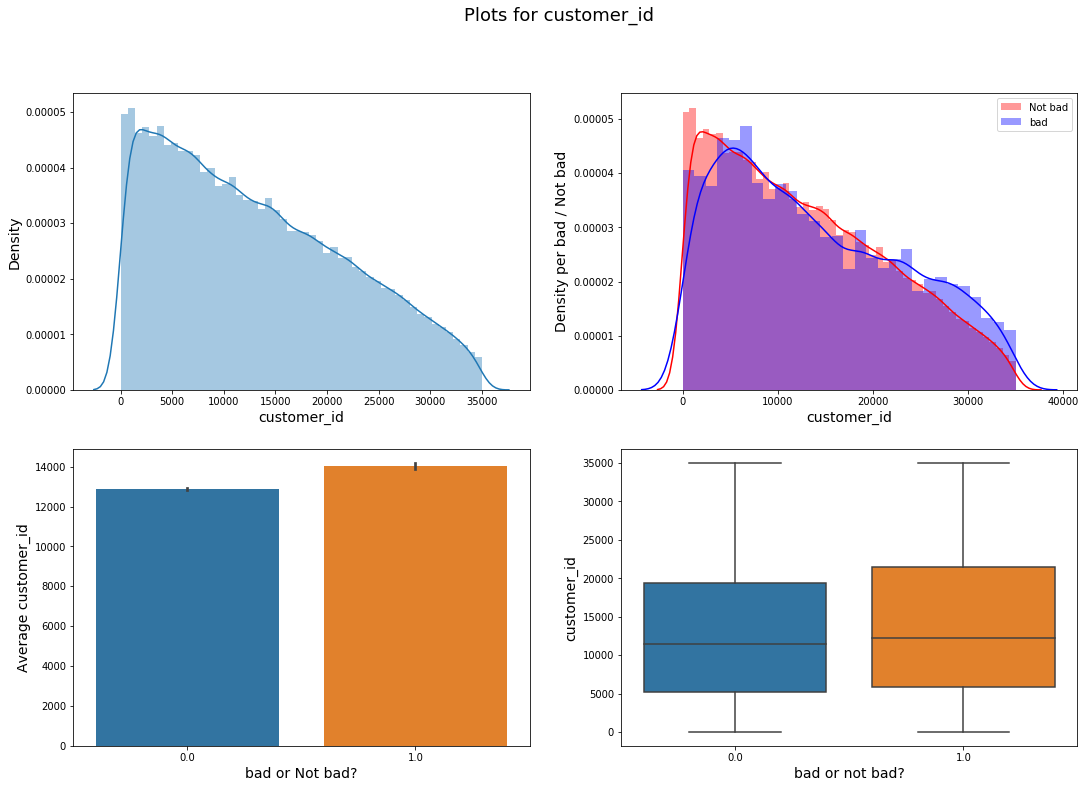

b_request_date


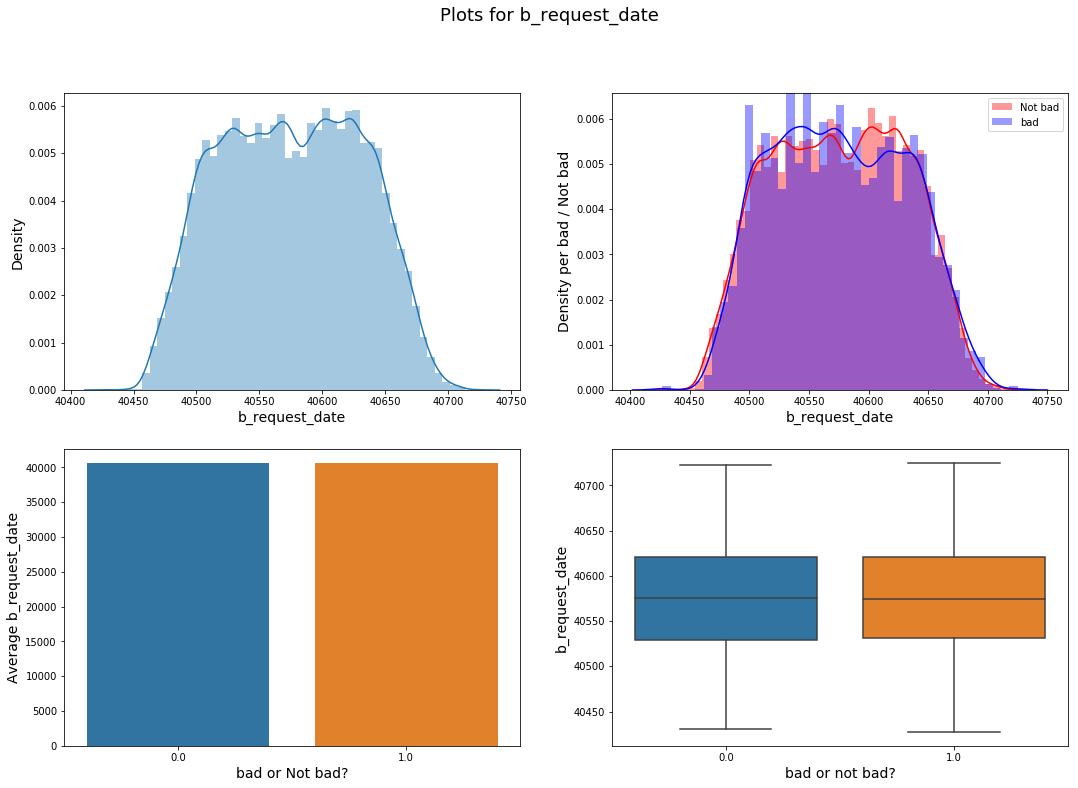

date_confirmed


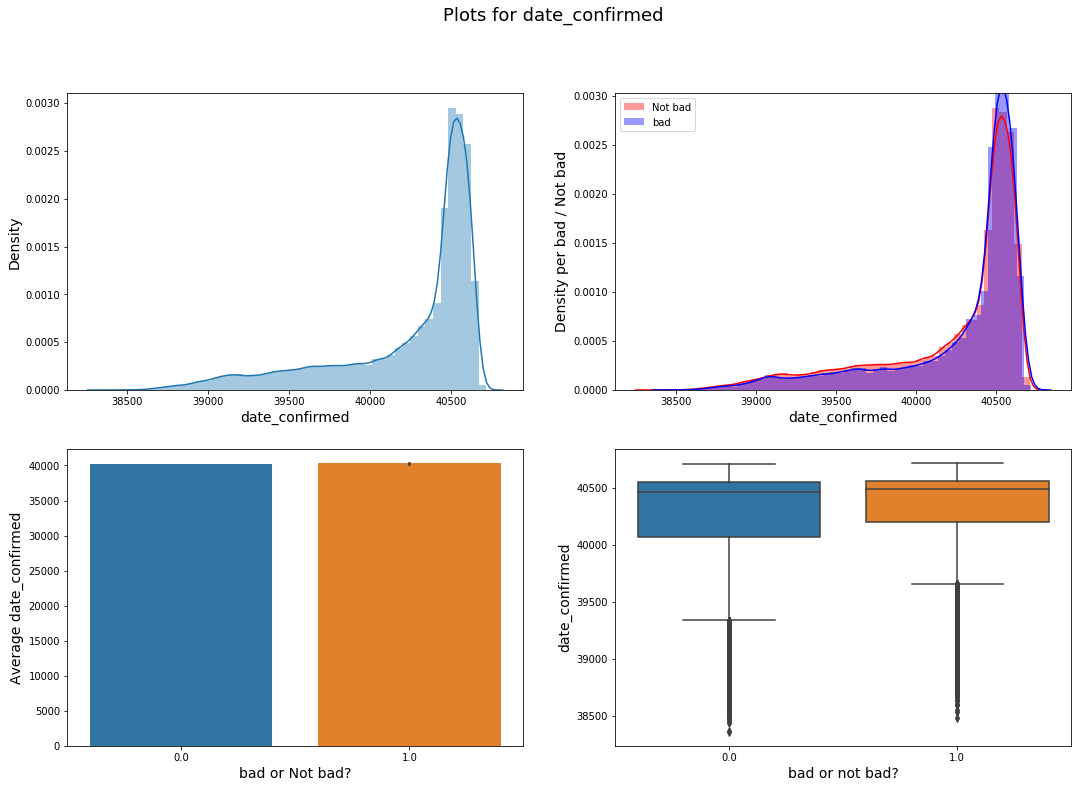

conract_open_date


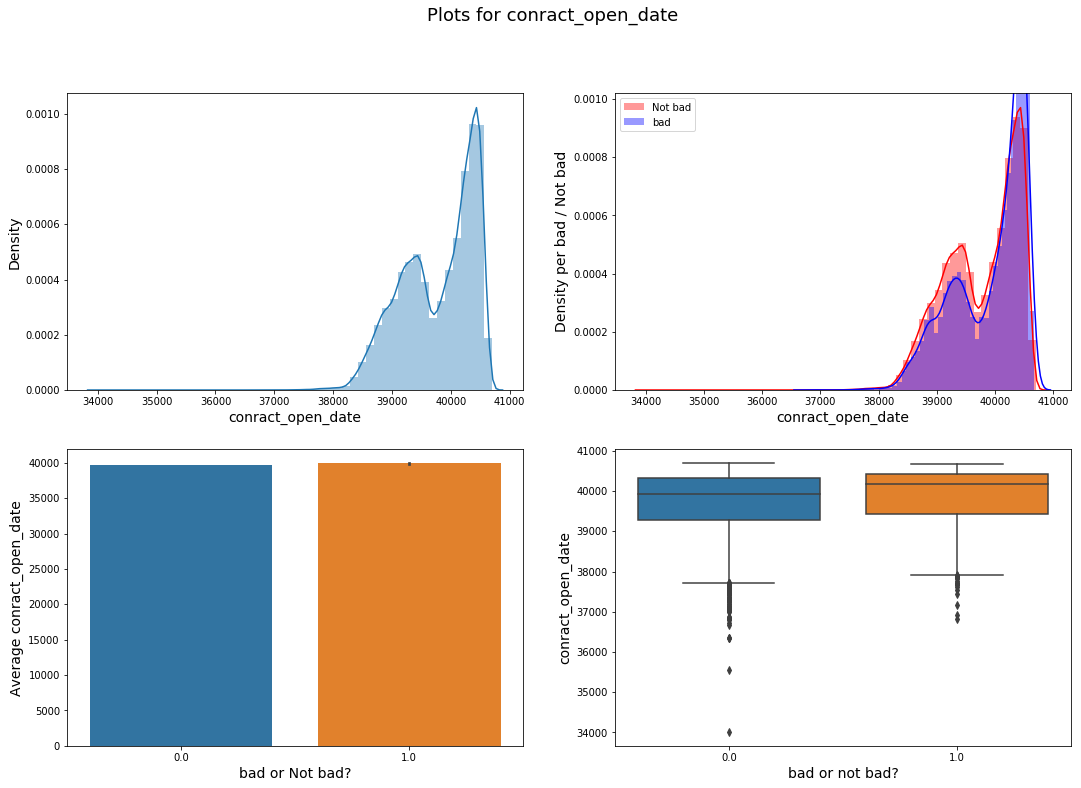

final_payment_date


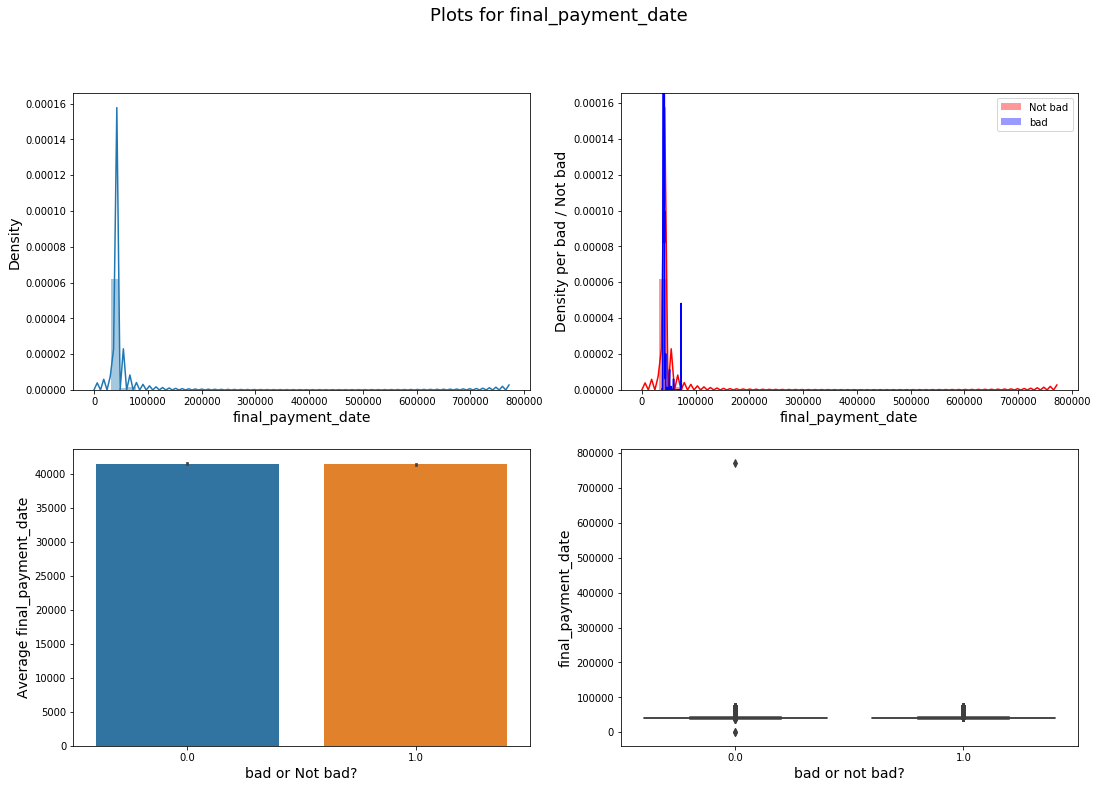

real_date_closed_account


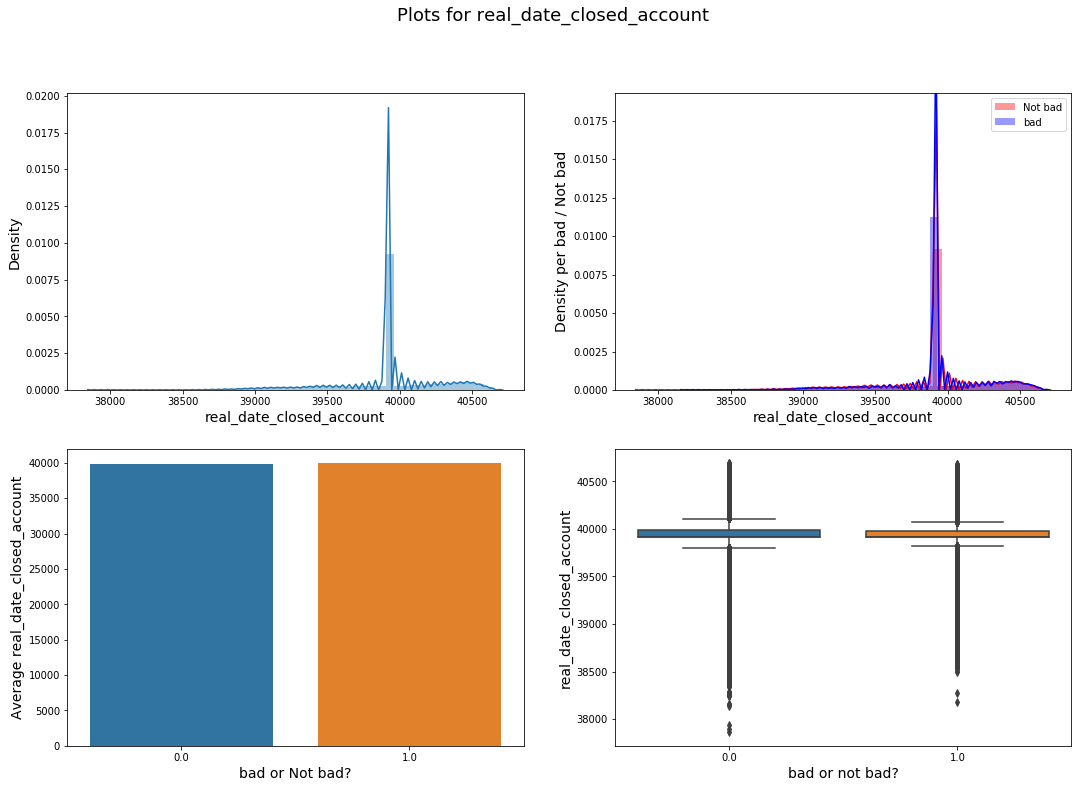

cred_limit


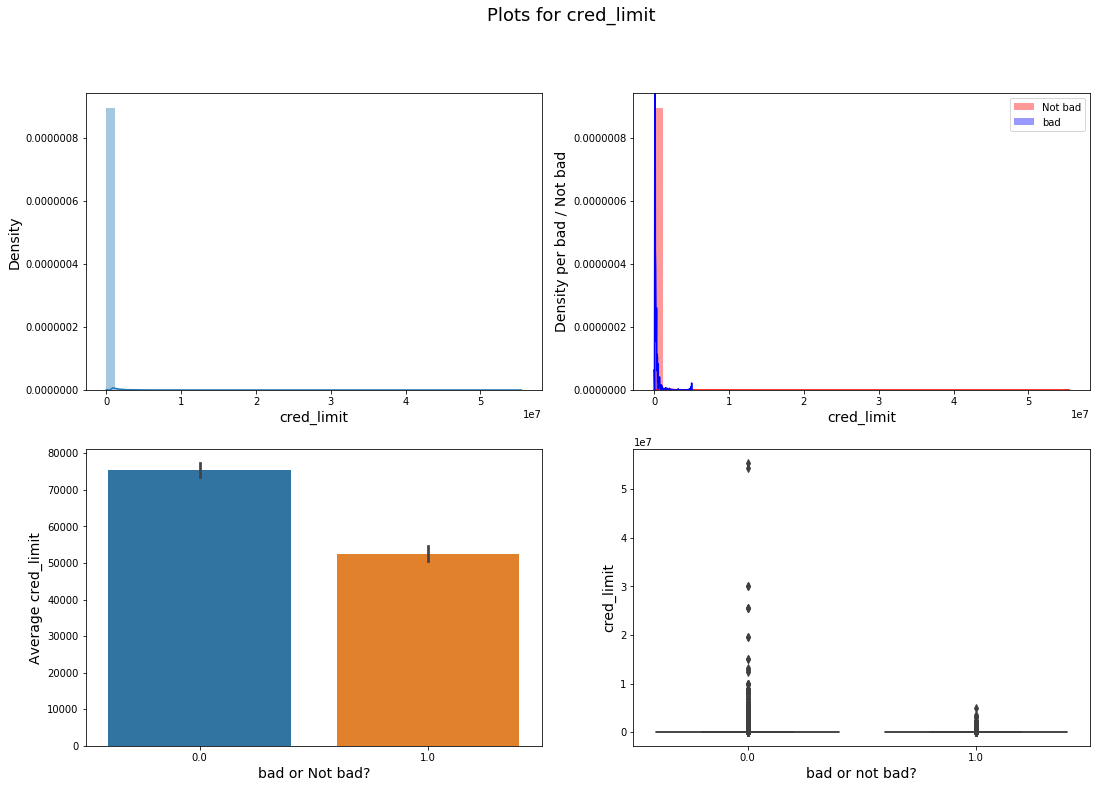

cur_debt


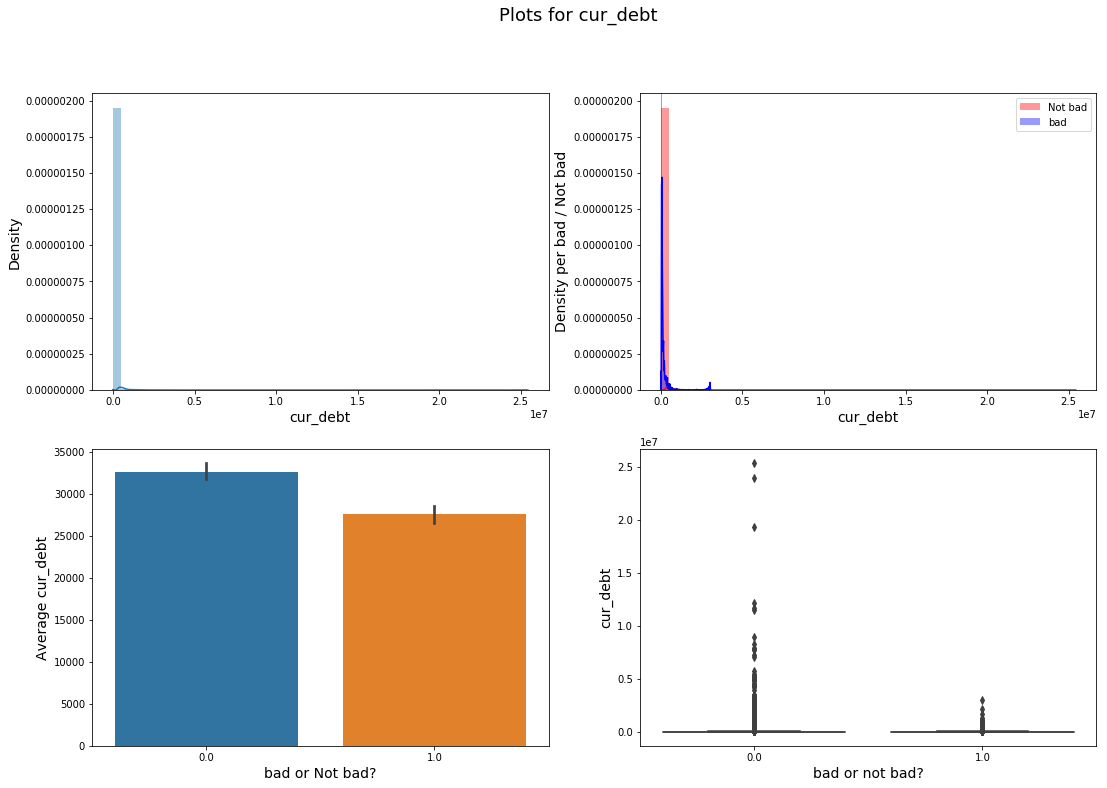

next_payment


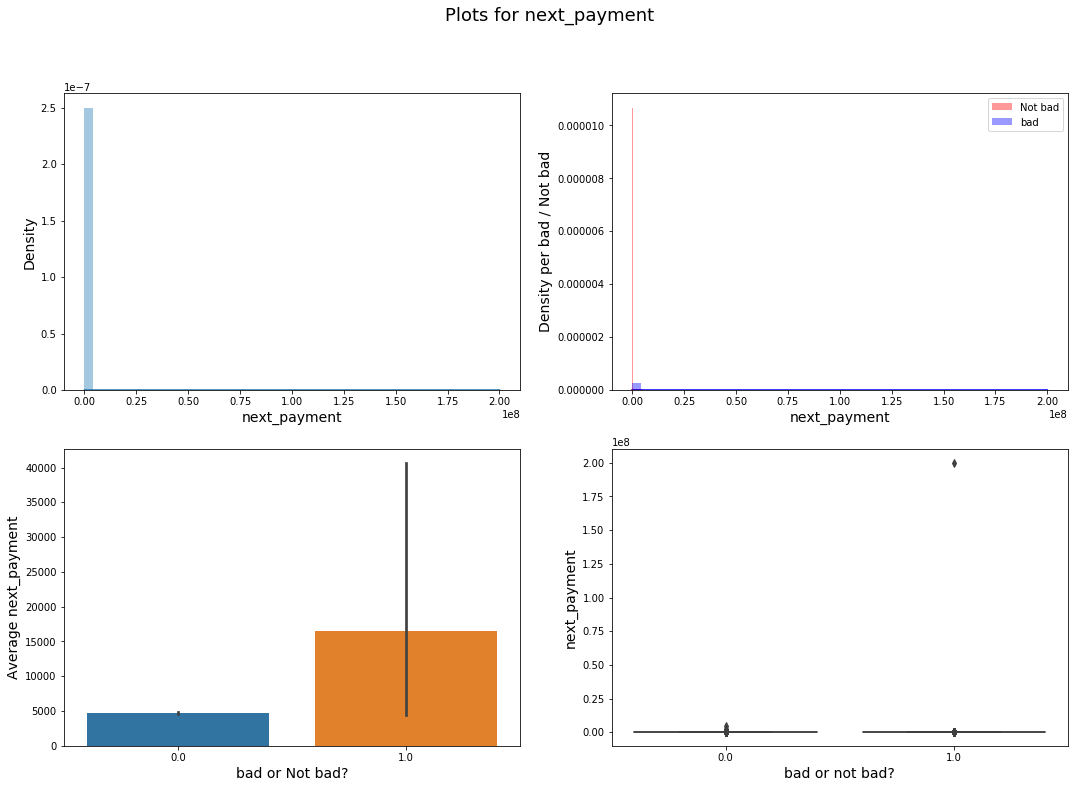

cur_balance


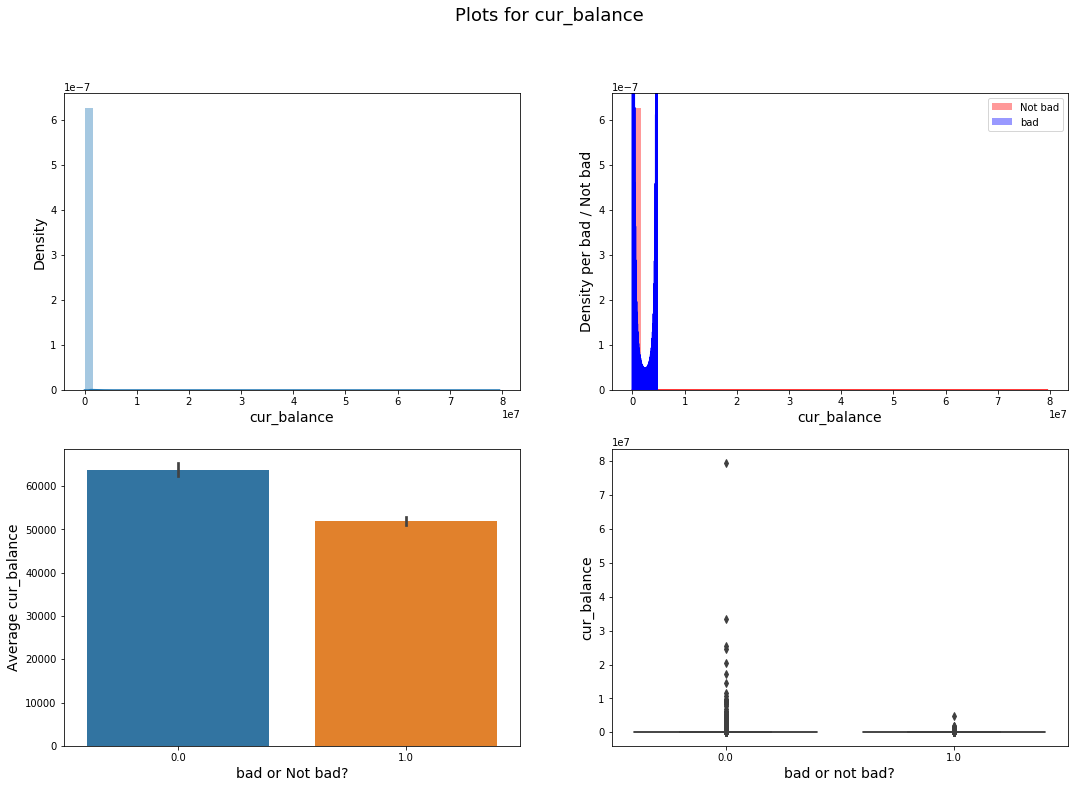

duration_debt_days


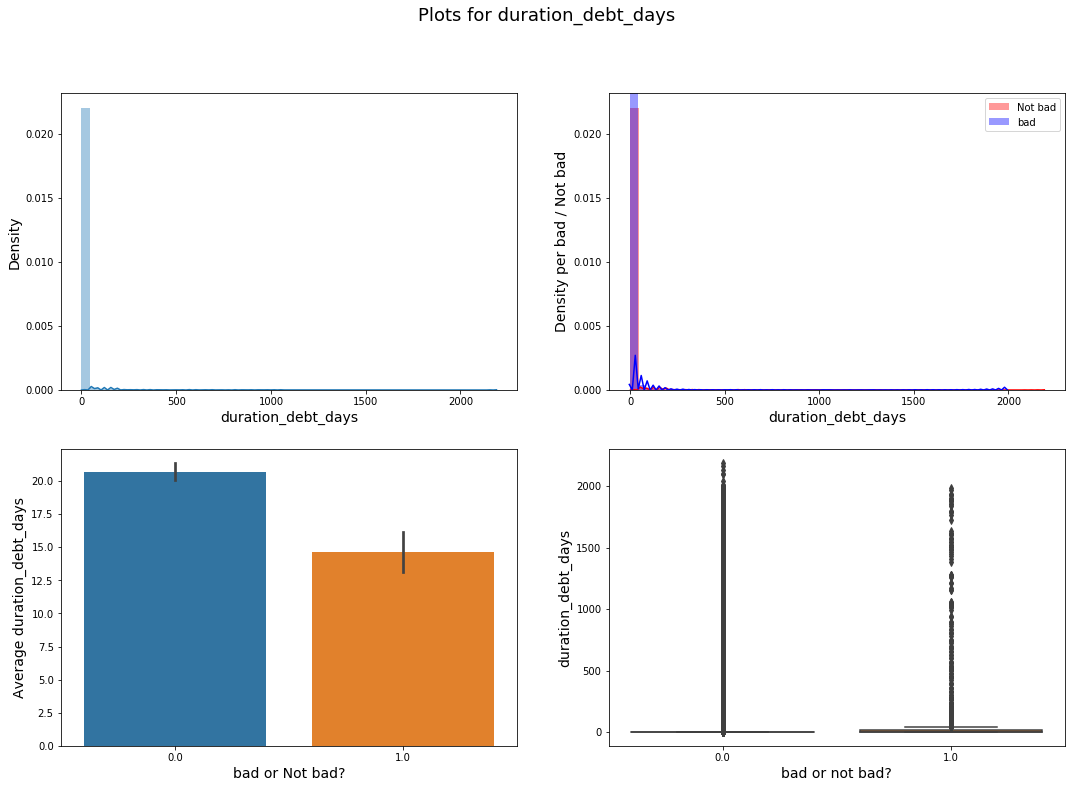

cnt_delay_upto_5d


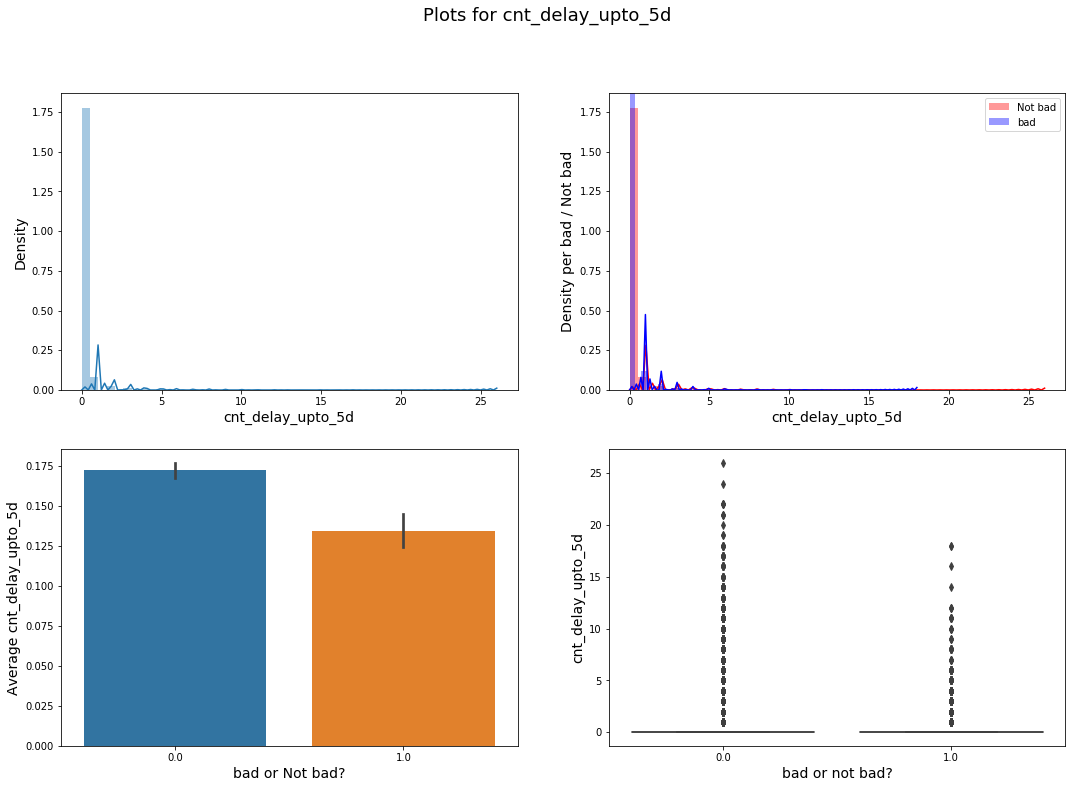

cnt_delay_5d_29d


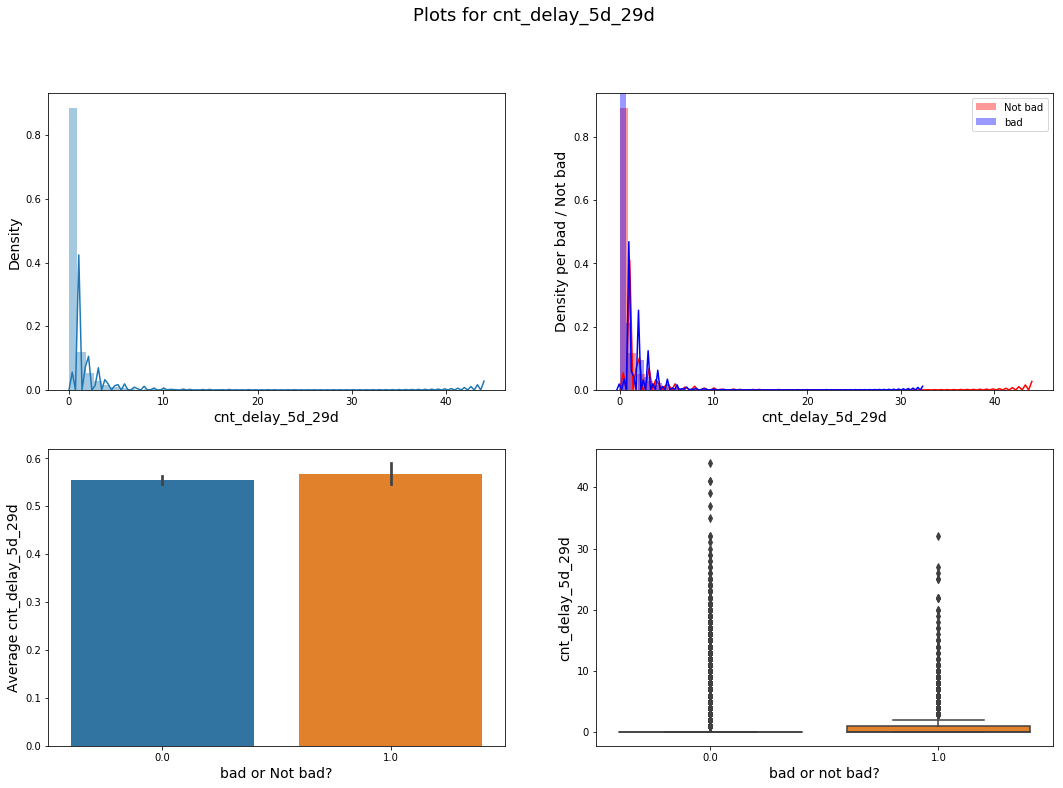

cnt_delay_upto_30d


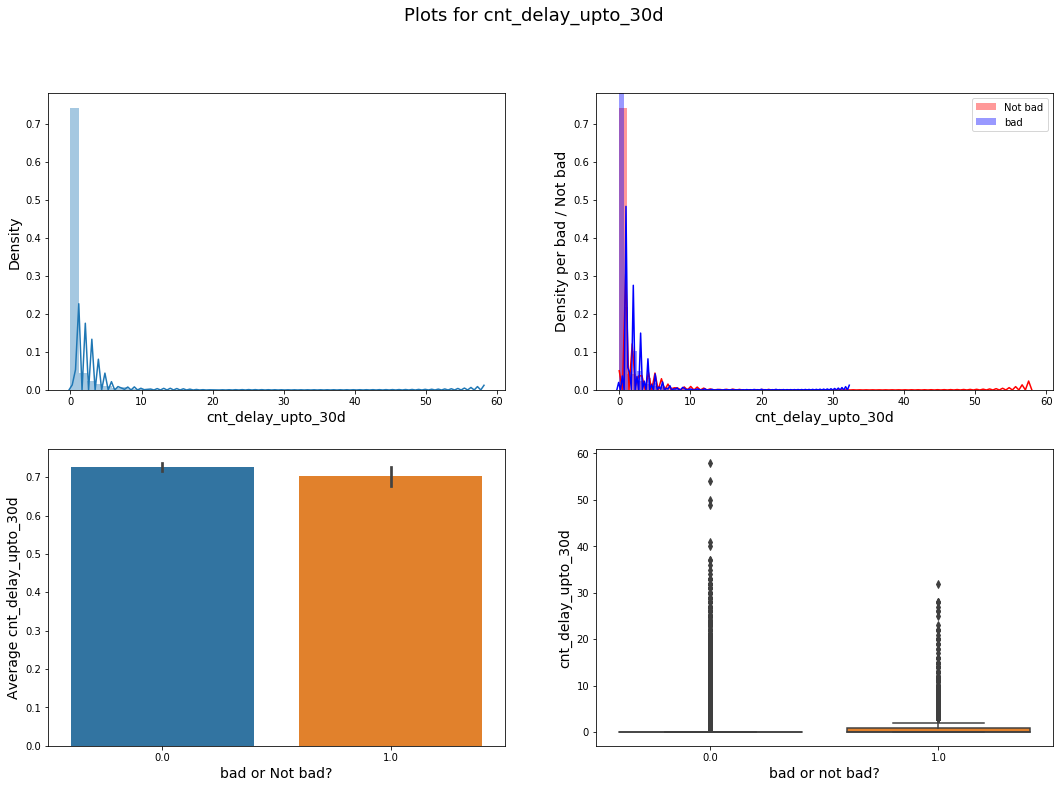

cnt_delay_30d_59d


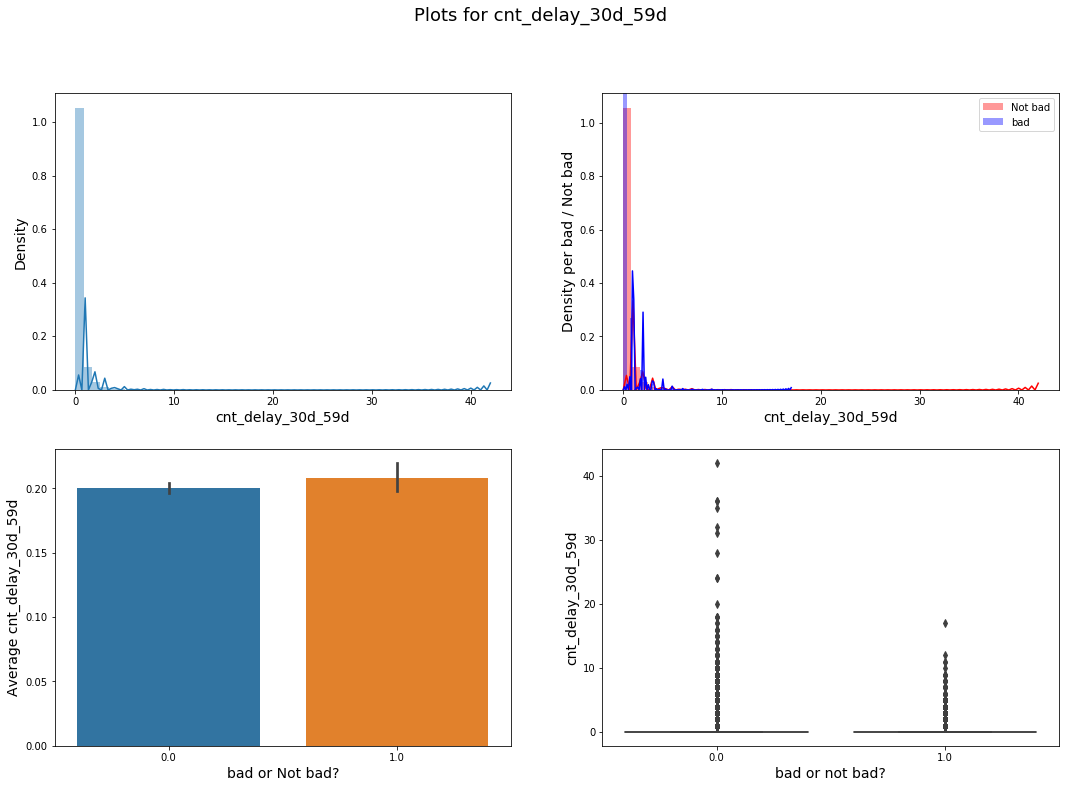

cnt_delay_60d_89d


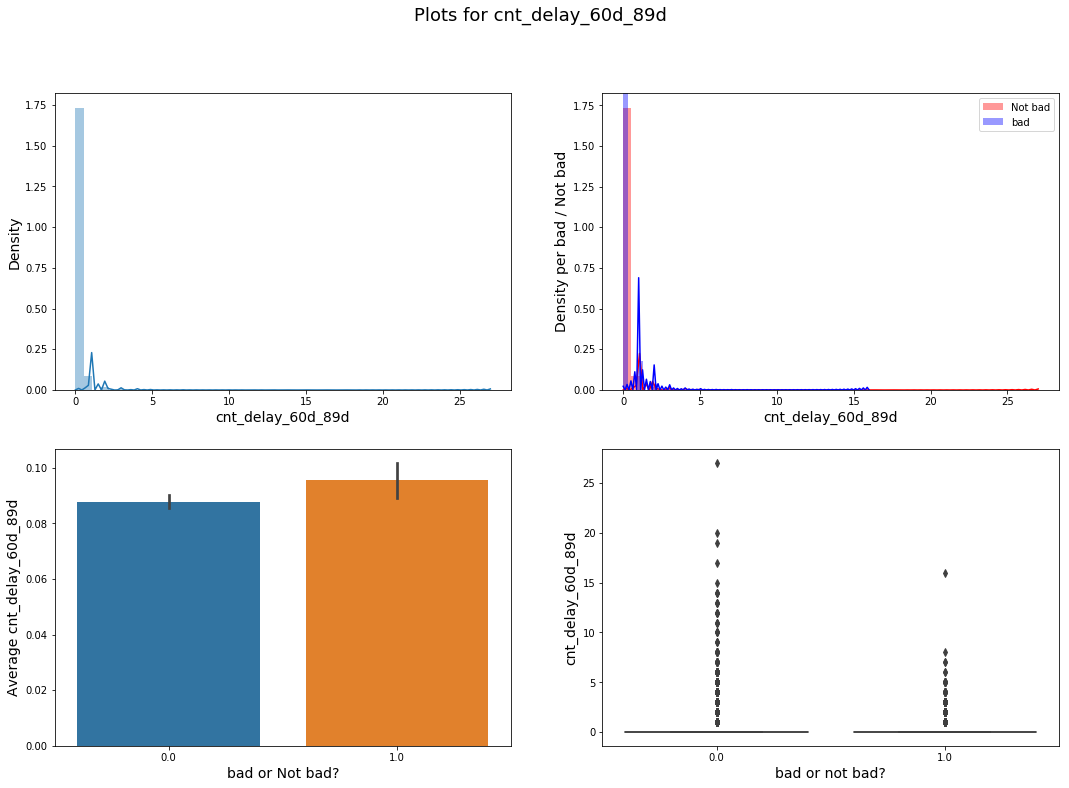

cnt_delay_upto_90d


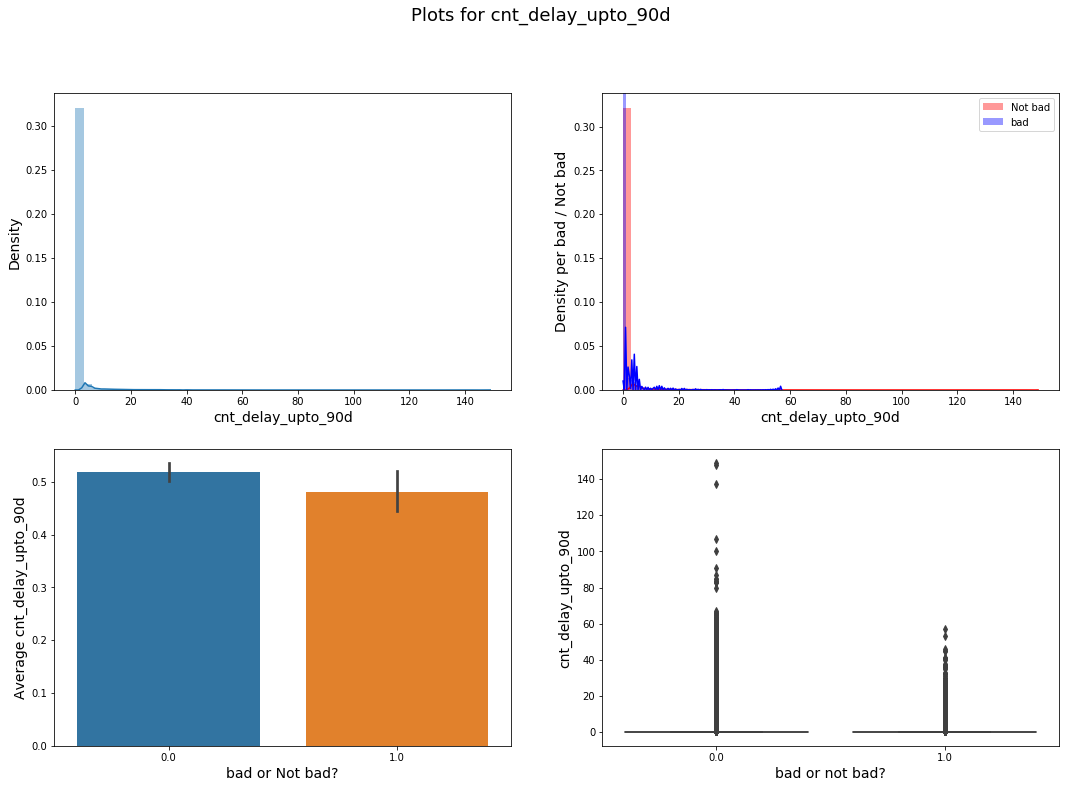

str_start


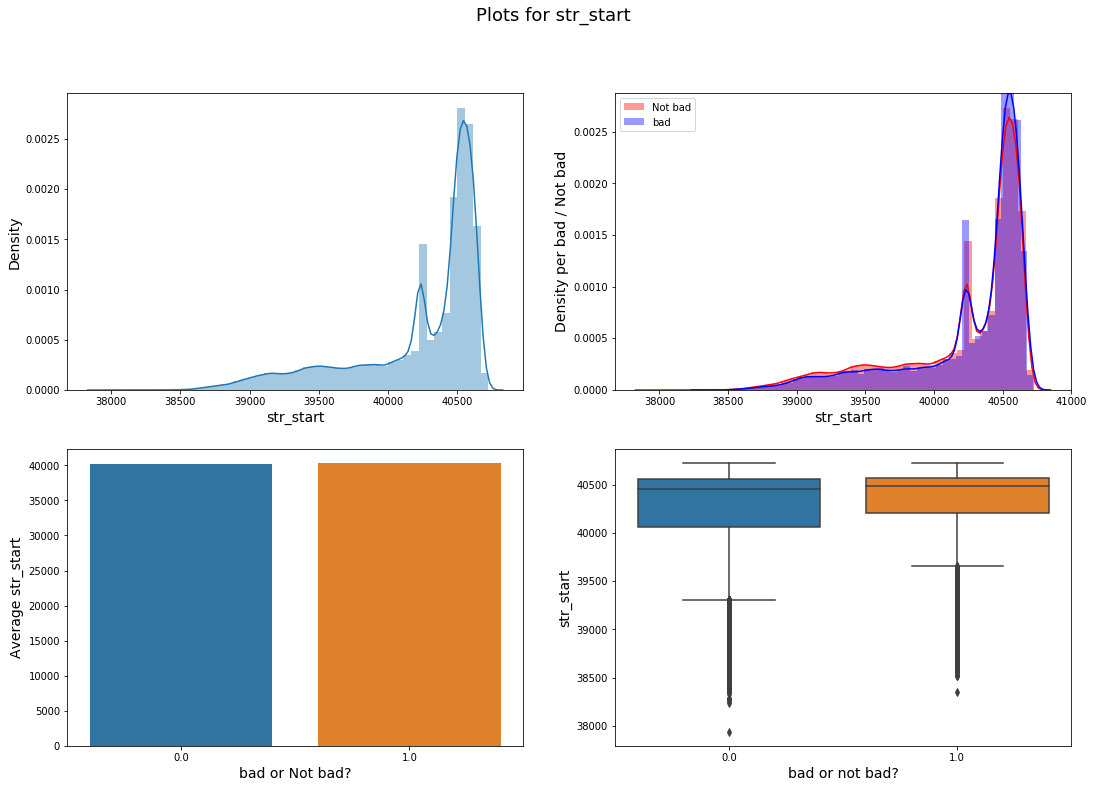

cur_overdue_debt


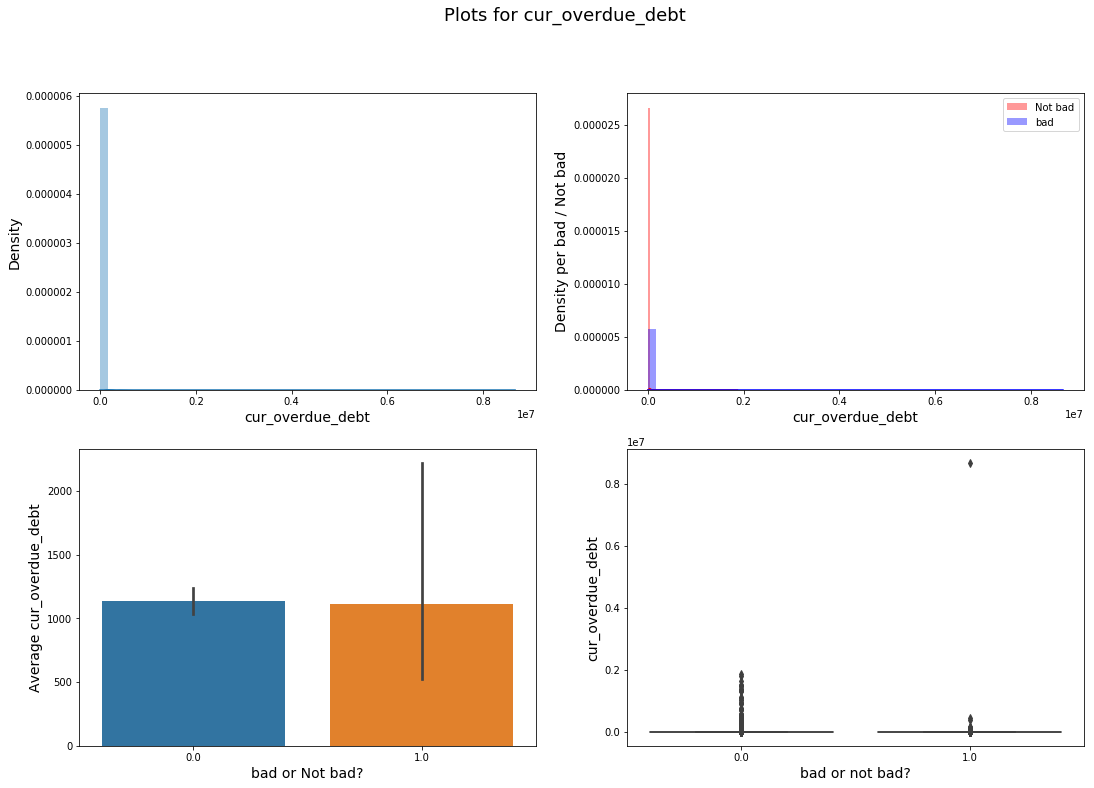

max_amount_debt


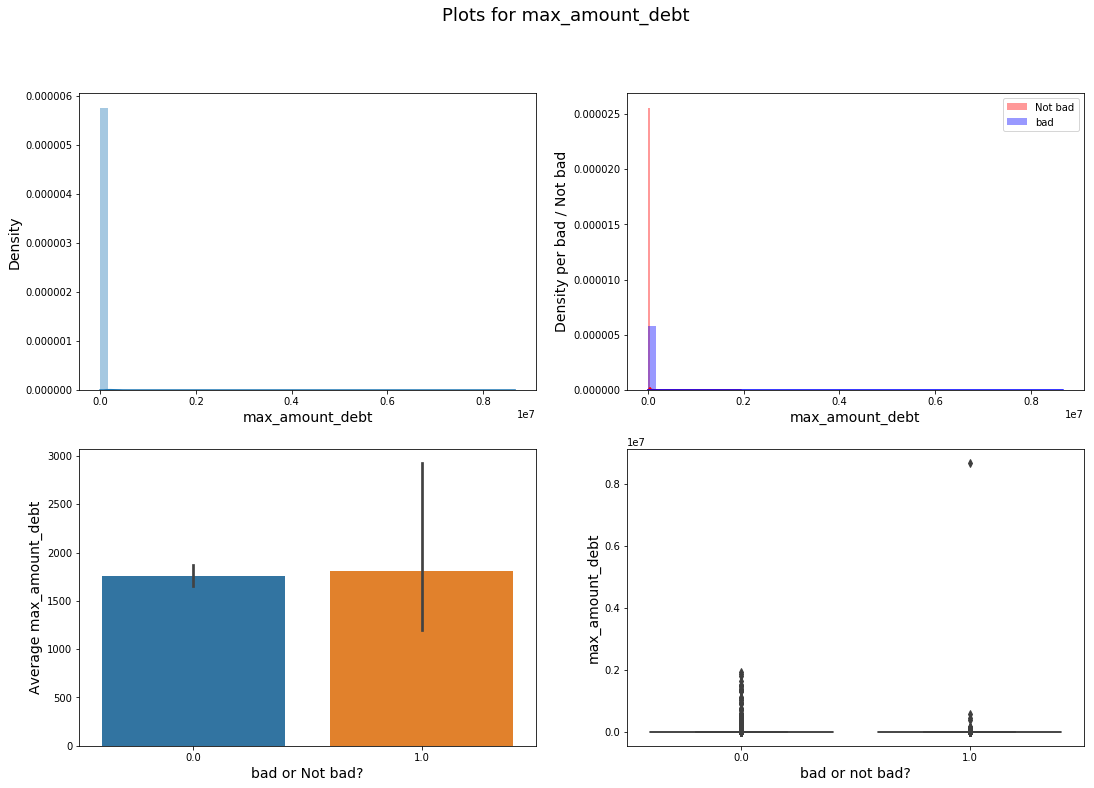

interest_rate_loan


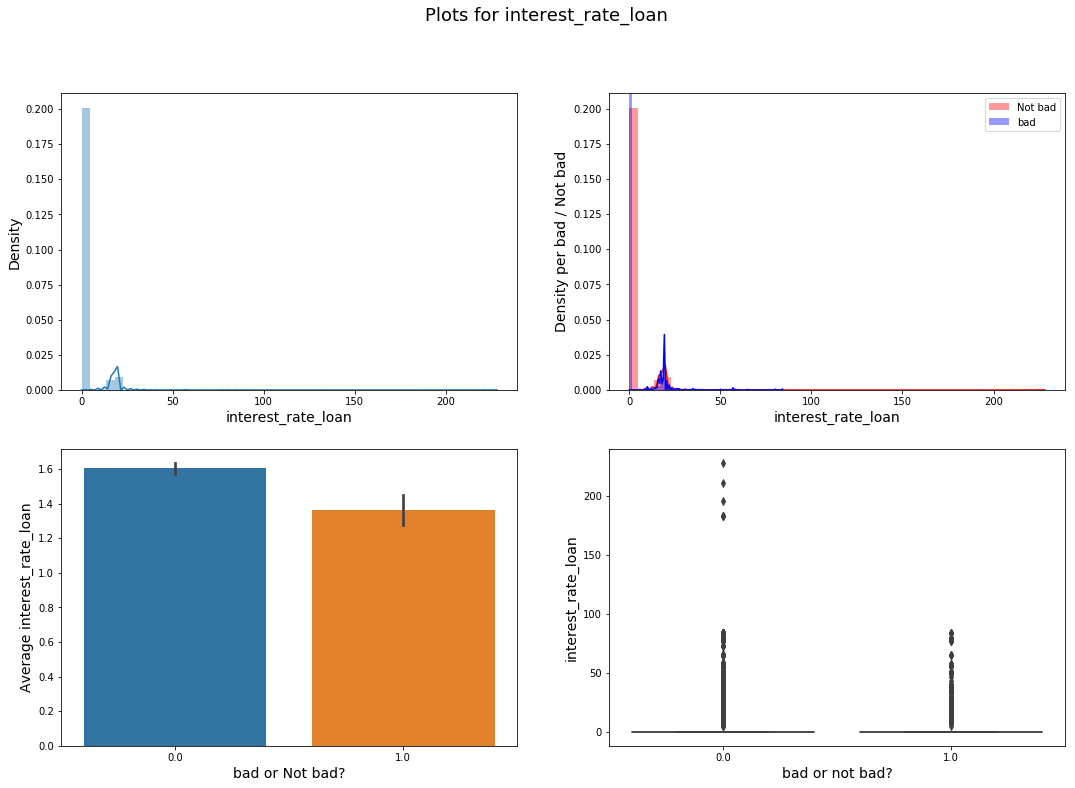

In [144]:
for var in num_vars:
    print(var)
    visualize_numerical(var, train_4)

## 5.2 EDA for categorical vars

In [145]:
for var in cat_vars:
    print(var)
    if train_4[var].nunique() > 100:
        print(train_4[var].value_counts())
    else:
        show_category_table(var, train_4)
    

b_id
          len  <lambda>      mean
b_id                             
1     65255.0  0.394400  0.108988
2     39856.0  0.240889  0.095569
3     60343.0  0.364712  0.095487
contract_type
                    len  <lambda>      mean
contract_type                              
1                3111.0  0.018803  0.068145
4                   1.0  0.000006  0.000000
6                1074.0  0.006491  0.057728
7               29146.0  0.176158  0.096411
9              115646.0  0.698962  0.101387
10                566.0  0.003421  0.075972
11                 75.0  0.000453  0.093333
12                 49.0  0.000296  0.122449
13                 39.0  0.000236  0.102564
14                  2.0  0.000012  0.000000
99              15745.0  0.095162  0.115211
contract_status
                     len  <lambda>      mean
contract_status                             
0                74370.0  0.449490  0.105069
12                   1.0  0.000006  0.000000
13               80200.0  0.484727  0.09204

                                     len  <lambda>      mean
real_date_closed_account_isnull                             
False                            80966.0  0.489357  0.092298
True                             84488.0  0.510643  0.109010
cur_debt_isnull
                      len  <lambda>      mean
cur_debt_isnull                              
False            133575.0  0.807324  0.104106
True              31879.0  0.192676  0.087111
next_payment_isnull
                         len  <lambda>      mean
next_payment_isnull                             
False                75088.0   0.45383  0.092278
True                 90366.0   0.54617  0.107939
cur_balance_isnull
                         len  <lambda>      mean
cur_balance_isnull                              
False                60343.0  0.364712  0.095487
True                105111.0  0.635288  0.103900
duration_debt_days_isnull
                                len  <lambda>      mean
duration_debt_days_isnull                  

# 6. Prepare dataset function

Function replaces nulls, corrects formats and generates dummy variables for categoricals

In [32]:
def prepare_dataset(df, cat_vars, num_vars):
    
    df = df.copy()
    cat_vars = cat_vars[:]
    num_vars = num_vars[:]
    
    # Changes in vars
    
    # Contract type
    contract_dict = {
    1:'low',
    4:'high',
    6:'low',
    7:'high',
    9:'high',
    10:'low',
    11:'high',
    12:'high',
    13:'high',
    14:'high',
    99:'high',
    }
    
    df['contract_type'] = df.contract_type.map(lambda x: contract_dict[x])
    
    # Contract status
    contract_status_dict = {
        0:'cat1',
        12:'cat1',
        13:'cat1',
        14:'cat2',
        52:'cat2',
        21:'cat3',
        61:'cat3'
    }

    df['contract_status'] = train.contract_status.map(lambda x: contract_status_dict[x])
    

    # Cur
    df['cur'] = df.cur == 0
    
    # trustatbility_code
    best_30 = list(df.trustability_code.value_counts().index[:30])
    df['trustability_code'] = df['trustability_code'].map(lambda x: x if x in best_30 else 'other')
    
    # code_frequency
    def freq_switch(x):
        if x in ['0', '0.0']:
            return '0'
        elif x in ['1','1.0','7','7.0']:
            return '1-7'
        else:
            return 'other'
    df['code_frequency_payments'] = df.code_frequency_payments.map(lambda x: freq_switch(x))
    
    # code relationship
    df['code_relationship_contract'] = df.code_relationship_contract.map(lambda x: 1 if x in (1,2) else 0)
    
    # Additional vars
    df['final_date_gtn_contract'] = df.final_payment_date > df.conract_open_date
    df['date_diff_contract_final'] = df.conract_open_date - df.final_payment_date
    df['date_diff_contract_confirmed'] = df.conract_open_date - df.date_confirmed
    df['date_diff_contract_real'] = df.conract_open_date = df.real_date_closed_account
    df['date_diff_final_confirmed'] = df.final_payment_date - df.date_confirmed
    df['date_diff_final_real'] = df.final_payment_date - df.real_date_closed_account
    df['date_diff_confirmed_real'] = df.date_confirmed - df.real_date_closed_account
    df['date_diff_b_contract'] = df.b_request_date - df.conract_open_date
    df['date_diff_b_final'] = df.b_request_date - df.final_payment_date
    df['date_diff_b_confirmed'] = df.b_request_date - df.date_confirmed
    df['date_diff_b_real'] = df.b_request_date = df.real_date_closed_account
    
    cat_vars.append('final_date_gtn_contract')
    
    new_nums = [
        'date_diff_contract_final',
        'date_diff_contract_confirmed',
        'date_diff_contract_real',
        'date_diff_final_confirmed',
        'date_diff_final_real',
        'date_diff_confirmed_real',
        'date_diff_b_contract',
        'date_diff_b_final',
        'date_diff_b_confirmed',
        'date_diff_b_real'
    ]
    
    num_vars += new_nums
    
    
    # generating dummy vars
    for var in cat_vars:
        pom = pd.get_dummies(df[var], prefix=var)
        df = pd.concat([df, pom], axis=1)
        df = df.drop(var, axis = 1)
    
    return(df)
    

In [33]:
train_5 = prepare_dataset(train_4, cat_vars, num_vars)

In [34]:
test_5 = prepare_dataset(test_4, cat_vars, num_vars)

In [ ]:
train_5.to_csv('../output/train_5.csv')
test_5.to_csv('../output/test_5.csv') #0.49409

# 7 Decision Tree

In [69]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

def plot_learning_curve(model, X, y, title = 'Learning Curves', ylim=(.0,1.02), cv=3,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(roc_auc_score))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    
    return plt



In [36]:
feats = list(train_5.columns)

In [37]:
feats.remove('is_bad')

(0.5162553071434679, 0.0062604440804732726)


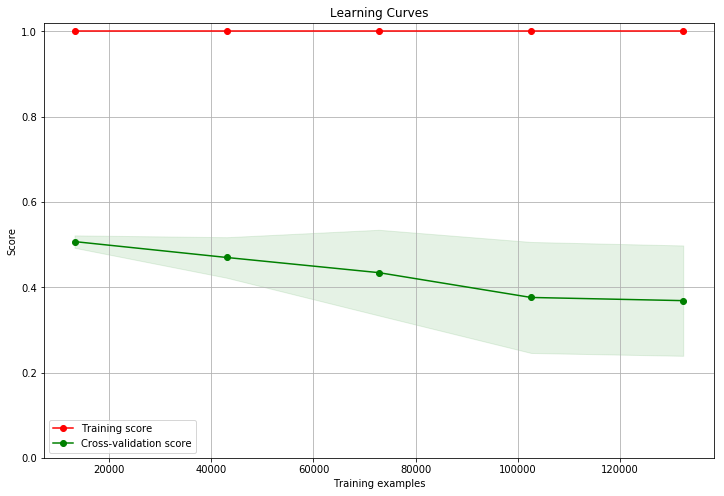

In [38]:
X = train_5[feats]
y = train_5.is_bad

model = DecisionTreeClassifier()

def validate_model(model, X, y):
    print(get_kfold_results(model, X, y))
    plt = plot_learning_curve(model, X,y)
    plt.show()
    
validate_model(model, X, y)

In [ ]:
DecisionTreeClassifier()

(0.50034157714161898, 0.00069139479911748238)


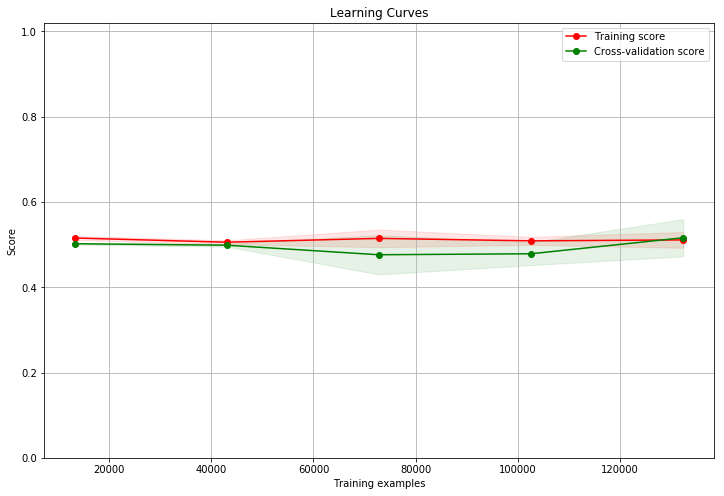

In [75]:
model2 = DecisionTreeClassifier(max_depth=5, max_features=0.3)
validate_model(model2, X, y )

# 8. Random Forest

In [76]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(0.50014661917117387, 0.00029323834234773472)


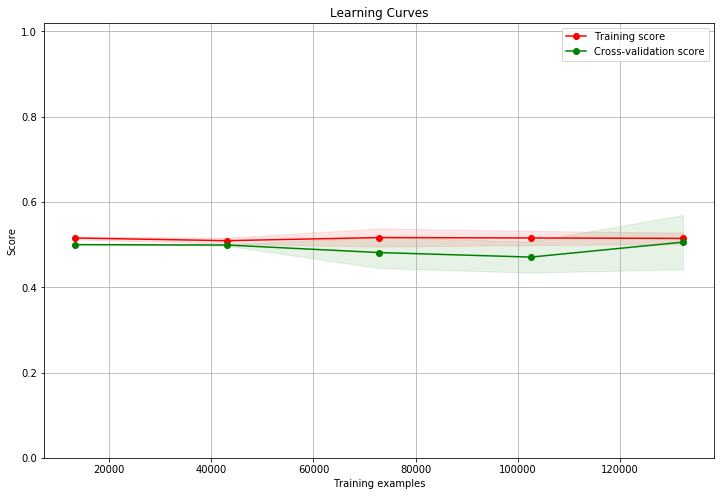

In [78]:
model3 = RandomForestClassifier(
    max_depth=10, 
    n_estimators = 100,
    n_jobs=-1
)
validate_model(model3, X, y)

# 9. Random Forest Tuned 

In [39]:
from hyperopt import hp
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial



In [105]:
 def objective(space):
    
    rf_params = {
        'max_depth': int(space['max_depth']),
        #'min_samples_leaf': space['min_samples_leaf'],
        'n_estimators': int(space['n_estimators']),
        'max_features': int(space['max_features'])
    }
    
    model = RandomForestClassifier(n_jobs=-1,**rf_params)
    score = 1-get_kfold_results(model, X, y, n_folds=3)[0]
    
    print("SCORE 1-ROC: {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('x_max_depth', 3, 30, 1),
    #'min_samples_leaf': hp.uniform('x_min_samples_leaf', 0.0005, 0.02),
    'n_estimators': hp.quniform('x_n_estimators', 100,500,100),
    'max_features': hp.quniform('x_max_features', 8, 30, 1)
}

trials = Trials()
best_params = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=10),
            max_evals=30,
            trials=trials)

print("The best params: ", best_params)

SCORE 1-ROC: 0.49629387215552
SCORE 1-ROC: 0.4974728669889138
SCORE 1-ROC: 0.4996796373237271
SCORE 1-ROC: 0.4955000843221624
SCORE 1-ROC: 0.49667658368866585
SCORE 1-ROC: 0.4961399980746556
SCORE 1-ROC: 0.4956898118124381
SCORE 1-ROC: 0.49651967800189334
SCORE 1-ROC: 0.49887380180531726
SCORE 1-ROC: 0.4980074228222141
SCORE 1-ROC: 0.5
SCORE 1-ROC: 0.49625968448999036
SCORE 1-ROC: 0.49460056518920903
SCORE 1-ROC: 0.5
SCORE 1-ROC: 0.49534262065374046
SCORE 1-ROC: 0.49639770779498626
SCORE 1-ROC: 0.4993885168001003
SCORE 1-ROC: 0.4971568958604916
SCORE 1-ROC: 0.4959139506640202
SCORE 1-ROC: 0.4951610932560364
SCORE 1-ROC: 0.4944806394977326
SCORE 1-ROC: 0.4943901579255785
SCORE 1-ROC: 0.4950607922234389
SCORE 1-ROC: 0.4951206560559137
SCORE 1-ROC: 0.49506075628581914
SCORE 1-ROC: 0.49473298334878757
SCORE 1-ROC: 0.4957356511420886
SCORE 1-ROC: 0.4960636411879803
SCORE 1-ROC: 0.4960045476896141
SCORE 1-ROC: 0.49521469616631375
The best params:  {'x_max_depth': 23.0, 'x_max_features': 30.0

In [106]:
print(best_params)

{'x_max_depth': 23.0, 'x_max_features': 30.0, 'x_n_estimators': 200.0}


In [107]:
 def objective(space):
    
    rf_params = {
        'max_depth': 23,
        #'min_samples_leaf': space['min_samples_leaf'],
        'n_estimators': 200,
        'max_features': int(space['max_features'])
    }
    
    model = RandomForestClassifier(n_jobs=-1,**rf_params)
    score = 1-get_kfold_results(model, X, y, n_folds=3)[0]
    
    print("SCORE 1-ROC: {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_features': hp.quniform('x_max_features', 25, 50, 1)
}

trials = Trials()
best_params_max_f_rf = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=10),
            max_evals=20,
            trials=trials)

print("The best params: ", best_params_max_f_rf)

SCORE 1-ROC: 0.49415452644931246
SCORE 1-ROC: 0.4952270120737675
SCORE 1-ROC: 0.49371566297457725
SCORE 1-ROC: 0.49456010419720897
SCORE 1-ROC: 0.4946148404356765
SCORE 1-ROC: 0.4941994965032861
SCORE 1-ROC: 0.4932744144656419
SCORE 1-ROC: 0.49435660684676563
SCORE 1-ROC: 0.4938893166973717
SCORE 1-ROC: 0.49477194485358955
SCORE 1-ROC: 0.49485159310498705
SCORE 1-ROC: 0.4952615626230873
SCORE 1-ROC: 0.49409092203314886
SCORE 1-ROC: 0.49314588069072895
SCORE 1-ROC: 0.4940766676684829
SCORE 1-ROC: 0.49428655231576835
SCORE 1-ROC: 0.4947097028256614
SCORE 1-ROC: 0.4940300982925717
SCORE 1-ROC: 0.49311215726640967
SCORE 1-ROC: 0.4942429321245726
The best params:  {'x_max_features': 50.0}


(0.50557025077128492, 0.0066146599472154365)


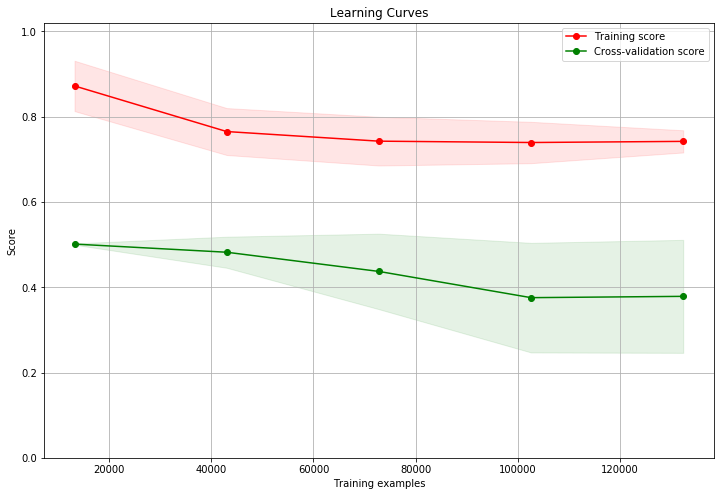

In [111]:
model4 = RandomForestClassifier(
    max_features = 50, 
    max_depth = 23, 
    n_estimators = 200
)

validate_model(model4, X, y)

# 10. XGBoost 

In [ ]:
import xgboost as xgb



def objective(space):
    
    xgb_params = {
        'max_depth': int(space['max_depth']),
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'min_child_weight': int(space['min_child_weight']),
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'n_estimators': int(space['n_estimators'])
    }
    
    model = xgb.XGBClassifier(seed=2017, **xgb_params)
    score = 1-get_kfold_results(model, X, y, n_folds=3)[0]
      
    print("SCORE(1-ROC AUC): {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('x_max_depth', 5, 20, 1),
    'colsample_bytree': hp.uniform ('x_colsample_bytree', 0.8, 1.),
    'learning_rate': hp.uniform ('x_learning_rate', 0.05, 0.2),
    'subsample': hp.uniform ('x_subsample', 0.7, 1.),
    'min_child_weight': hp.quniform ('x_min_child_weight', 1, 10, 1),
    'reg_alpha': hp.loguniform ('x_reg_alpha', 0., 1.),
    'reg_lambda': hp.uniform ('x_reg_lambda', 0.7, 1.),
    'n_estimators': hp.quniform('x_n_estimators', 50, 300, 50)
}


trials = Trials()
best_params_xg = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=5),
            max_evals=20,
            trials=trials)

print("The best params: ", best_params_xg)

SCORE(1-ROC AUC): 0.49565177643363356
SCORE(1-ROC AUC): 0.4935268174262396
SCORE(1-ROC AUC): 0.4959032975426926
SCORE(1-ROC AUC): 0.4983154363693657
SCORE(1-ROC AUC): 0.4900620289119083
SCORE(1-ROC AUC): 0.4950825908608635
SCORE(1-ROC AUC): 0.4923712326002748
SCORE(1-ROC AUC): 0.4928533779337577
SCORE(1-ROC AUC): 0.49733214409697546
SCORE(1-ROC AUC): 0.4943083354420249
SCORE(1-ROC AUC): 0.4968449274397715
SCORE(1-ROC AUC): 0.4916972278686501
SCORE(1-ROC AUC): 0.49406191086751294
SCORE(1-ROC AUC): 0.49407352828446915
SCORE(1-ROC AUC): 0.49708992576320055
SCORE(1-ROC AUC): 0.49213833081991165
SCORE(1-ROC AUC): 0.4985466883336893
SCORE(1-ROC AUC): 0.4911260106239549


In [115]:
best_params_xg

{'x_colsample_bytree': 0.9159219866209274,
 'x_learning_rate': 0.19850826307080238,
 'x_max_depth': 12.0,
 'x_min_child_weight': 4.0,
 'x_n_estimators': 200.0,
 'x_reg_alpha': 2.3795928354854117,
 'x_reg_lambda': 0.7261862706345641,
 'x_subsample': 0.9540353610344867}

(0.51366352561078255, 0.0026955230577886133)


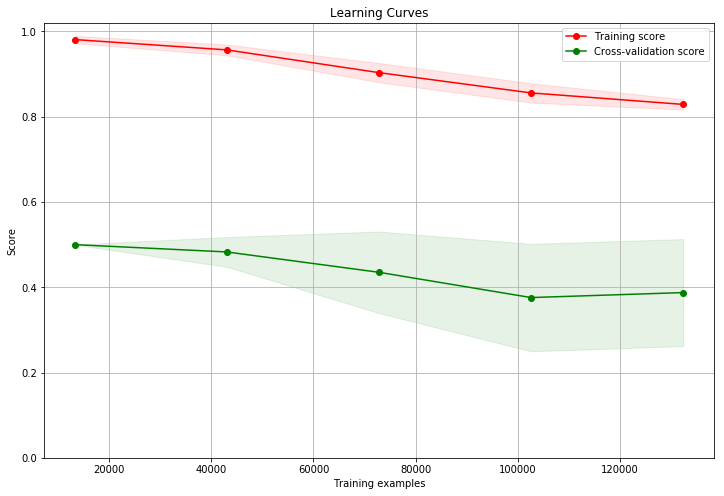

In [117]:
model5 = xgb.XGBClassifier(seed=2017, 
 colsample_bytree = 0.9159219866209274,
 learning_rate = 0.19850826307080238,
 max_depth = 12,
 min_child_weight = 4,
 n_estimators = 200,
 reg_alpha = 2.3795928354854117,
 reg_lambda = 0.7261862706345641,
 subsample = 0.9540353610344867
)
validate_model(model5, X, y)

## 11. First Submission
Trzeba przygotować plik który będzie zawierał: `customer_id` i `is_bad`.

In [41]:
model5_s = xgb.XGBClassifier(seed=2017, 
 colsample_bytree = 0.9159219866209274,
 learning_rate = 0.19850826307080238,
 max_depth = 12,
 min_child_weight = 4,
 n_estimators = 200,
 reg_alpha = 2.3795928354854117,
 reg_lambda = 0.7261862706345641,
 subsample = 0.9540353610344867
)
model5_s.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9159219866209274, gamma=0,
       learning_rate=0.19850826307080238, max_delta_step=0, max_depth=12,
       min_child_weight=4, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=2.3795928354854117, reg_lambda=0.7261862706345641,
       scale_pos_weight=1, seed=2017, silent=True,
       subsample=0.9540353610344867)

In [46]:
a = list(train_5.columns)
b = list(test_5.columns)

In [47]:
cols = []
for el in a:
    if el not in b and el != 'is_bad':
        cols.append(el)

In [48]:
for c in cols:
    test_5[c] = 0

In [49]:
print(cols)

['contract_status_cat1', 'contract_status_cat2', 'contract_status_cat3', 'trustability_code_111110', 'trustability_code_11111111110', 'trustability_code_111X', 'trustability_code_X1', 'trustability_code_X11', 'trustability_code_X11111', 'trustability_code_X111111', 'trustability_code_X1111111111', 'trustability_code_X111111111111', 'trustability_code_XX']


In [ ]:
y_pred = model5_s.predict(test_5)

In [50]:
vars = list(train_5.columns)
vars.remove('is_bad')
test_to_score = test_5[vars]

In [139]:
y_pred = model5_s.predict(test_to_score)

In [146]:
test_to_score_prob = test_to_score.copy()
test_to_score_prob = test_to_score_prob.drop('is_bad', axis=1)
y_pred_prob = model5_s.predict_proba(test_to_score_prob)


In [141]:
test_to_score['is_bad'] = y_pred
test_to_score[ ['customer_id', 'is_bad'] ].to_csv('../output/model_5s.csv', index=False) #0.49409

/home/jupyter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
y_pred_prob2 = []
for el in y_pred_prob:
    y_pred_prob2.append(el[1])

In [154]:
y_pred_prob[:5]

array([[ 0.96020436,  0.03979562],
       [ 0.99174958,  0.00825044],
       [ 0.93592328,  0.0640767 ],
       [ 0.92129368,  0.07870634],
       [ 0.94216514,  0.05783485]], dtype=float32)

In [155]:
y_pred_prob2[:5]

[0.039795622, 0.0082504433, 0.064076699, 0.078706339, 0.057834849]

In [157]:
test_to_score_prob['is_bad'] = y_pred_prob2
test_to_score_prob[ ['customer_id', 'is_bad'] ].to_csv('../output/model_5s_prob.csv', index=False) 

# Understandig success metric is crucial! 

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# new classes with predict method overrided by predict_proba
# because learning curves uses predict method

class DecisionTreeClassifier_prob(DecisionTreeClassifier):
    
    def predict(self, X):
        new_pred = np.array([x[1] for x in self.predict_proba(X)])
        return(new_pred)
    
    
class RandomForestClassifier_prob(RandomForestClassifier):
    
    def predict(self, X):
        new_pred = np.array([x[1] for x in self.predict_proba(X)])
        return(new_pred)

    
class XGBClassifier_prob(xgb.XGBClassifier):
    
    def predict(self, X):
        new_pred = np.array([x[1] for x in self.predict_proba(X)])
        return(new_pred)



# 12. Decision Tree Again

In [43]:
X = train_5
X = X.drop('is_bad', axis = 1)
y = train_5.is_bad

(0.57868545672325855, 0.023880525462004847)


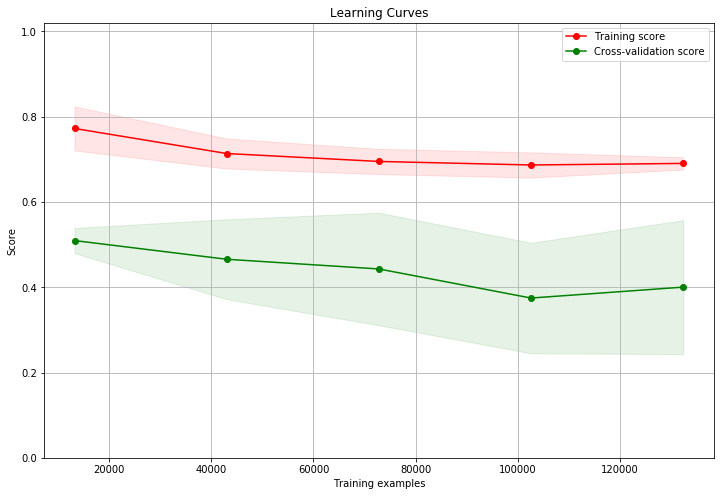

In [146]:
model_6 = DecisionTreeClassifier_prob(min_samples_leaf=.01)
validate_model(model_6, X, y)

# 13 Random Forest Tuned 2

In [54]:
 def objective(space):
    
    rf_params = {
        'max_depth': int(space['max_depth']),
        #'min_samples_leaf': space['min_samples_leaf'],
        'n_estimators': int(space['n_estimators']),
        'max_features': int(space['max_features'])
    }
    
    model = RandomForestClassifier_prob(n_jobs=-1,**rf_params)
    score = 1-get_kfold_results(model, X, y, n_folds=3)[0]
    
    print("SCORE 1-ROC: {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('x_max_depth', 3, 40, 1),
    #'min_samples_leaf': hp.uniform('x_min_samples_leaf', 0.0005, 0.02),
    'n_estimators': hp.quniform('x_n_estimators', 100,500,100),
    'max_features': hp.quniform('x_max_features', 8, 50, 1)
}

trials = Trials()
best_params = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=5),
            max_evals=20,
            trials=trials)

print("The best params: ", best_params)

SCORE 1-ROC: 0.4223688671991509
SCORE 1-ROC: 0.4121455701235591
SCORE 1-ROC: 0.42173416883521664
SCORE 1-ROC: 0.4214824884744721
SCORE 1-ROC: 0.41327488842670557
SCORE 1-ROC: 0.4136328177275156
SCORE 1-ROC: 0.40416665420417885
SCORE 1-ROC: 0.4055337584714792
SCORE 1-ROC: 0.4054522729867511
SCORE 1-ROC: 0.4080270019794471
SCORE 1-ROC: 0.4182259847779136
SCORE 1-ROC: 0.40485161436366157
SCORE 1-ROC: 0.4185954027033717
SCORE 1-ROC: 0.4085948133653753
SCORE 1-ROC: 0.40799939053629863
SCORE 1-ROC: 0.41608527119603034
SCORE 1-ROC: 0.41728318765078487
SCORE 1-ROC: 0.4042526187385219
SCORE 1-ROC: 0.4078823651188711
SCORE 1-ROC: 0.409101774900815
The best params:  {'x_max_depth': 12.0, 'x_max_features': 48.0, 'x_n_estimators': 500.0}


In [ ]:
best_params = {'max_depth': 12, 'max_features': 48, 'n_estimators': 500}
model7 = RandomForestClassifier_prob(**best_params)
validate_model(model7, X, y)

# 14 XGBoost Tuned v2

In [21]:
from hyperopt import hp
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial

In [25]:
import xgboost as xgb


def objective(space):
    
    xgb_params = {
        'max_depth': int(space['max_depth']),
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'min_child_weight': int(space['min_child_weight']),
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'n_estimators': int(space['n_estimators'])
    }
    
    model = XGBClassifier_prob(seed=2017, **xgb_params)
    score = 1-get_kfold_results(model, X, y, n_folds=3)[0]
      
    print("SCORE(1-ROC AUC): {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('max_depth', 5, 20, 1),
    'colsample_bytree': hp.uniform ('colsample_bytree', 0.8, 1.),
    'learning_rate': hp.uniform ('learning_rate', 0.05, 0.2),
    'subsample': hp.uniform ('subsample', 0.7, 1.),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    'reg_alpha': hp.loguniform ('reg_alpha', 0., 1.),
    'reg_lambda': hp.uniform ('reg_lambda', 0.7, 1.),
    'n_estimators': hp.quniform('n_estimators', 50, 300, 50)
}


trials = Trials()
best_params_xg = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=5),
            max_evals=20,
            trials=trials)

print("The best params: ", best_params_xg)

SCORE(1-ROC AUC): 0.37969320977254417
SCORE(1-ROC AUC): 0.36396587027680505
SCORE(1-ROC AUC): 0.34366299887103313
SCORE(1-ROC AUC): 0.3592885222371597
SCORE(1-ROC AUC): 0.37416064096765034


KeyboardInterrupt: 

In [26]:
best_params_xg

NameError: name 'best_params_xg' is not defined

In [28]:
trials.results

[{'loss': 0.37969320977254417, 'status': 'ok'},
 {'loss': 0.36396587027680505, 'status': 'ok'},
 {'loss': 0.34366299887103313, 'status': 'ok'},
 {'loss': 0.3592885222371597, 'status': 'ok'},
 {'loss': 0.37416064096765034, 'status': 'ok'},
 {'status': 'new'}]

In [31]:
trials.trials[2]['misc']['vals']

{'colsample_bytree': [0.971096700158229],
 'learning_rate': [0.15853563323482023],
 'max_depth': [12.0],
 'min_child_weight': [4.0],
 'n_estimators': [250.0],
 'reg_alpha': [1.7447437821414373],
 'reg_lambda': [0.9646217693872972],
 'subsample': [0.9932679581269992]}

In [51]:
vars = list(train_5.columns)
vars.remove('is_bad')
test_to_score = test_5[vars]

In [52]:
model8 = xgb.XGBClassifier(
    seed = 2017,
    colsample_bytree=0.971096700158229,
    learning_rate=0.15853563323482023,
    max_depth=12,
    min_child_weight=4,
    n_estimators=250,
    reg_alpha=1.7447437821414373,
    reg_lambda = 0.9646217693872972,
    subsample = 0.9932679581269992
)

model8.fit(X,y)

predict_y = model8.predict_proba(test_to_score)

In [41]:
predict_y[:10]

array([[ 0.96851861,  0.03148139],
       [ 0.99579287,  0.00420711],
       [ 0.95702225,  0.04297774],
       [ 0.82954967,  0.17045034],
       [ 0.95645267,  0.04354735],
       [ 0.89311504,  0.10688499],
       [ 0.97081631,  0.02918371],
       [ 0.91138464,  0.08861537],
       [ 0.92309296,  0.07690706],
       [ 0.97393483,  0.02606515]], dtype=float32)

In [42]:
is_bad_score = np.array([x[1] for x in predict_y])

In [44]:
test_to_score['is_bad'] = is_bad_score
test_to_score[ ['customer_id', 'is_bad'] ].to_csv('../output/model_8_prob.csv', index=False) 

/home/jupyter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
model8_val = XGBClassifier_prob(
    seed = 2017,
    colsample_bytree=0.971096700158229,
    learning_rate=0.15853563323482023,
    max_depth=12,
    min_child_weight=4,
    n_estimators=250,
    reg_alpha=1.7447437821414373,
    reg_lambda = 0.9646217693872972,
    subsample = 0.9932679581269992
)
validate_model(model8_val, X, y)

In [59]:
feats = pd.DataFrame(model8.feature_importances_, index=X.columns)
feats = feats.sort_values(by=[0], ascending=False) [:30]

In [60]:
feats

,0
customer_id,0.187504
cred_limit,0.097185
date_diff_contract_confirmed,0.071513
date_diff_b_contract,0.068226
date_diff_contract_final,0.059080
final_payment_date,0.049487
date_diff_b_final,0.049397
str_start,0.048883
date_diff_b_confirmed,0.046535
date_confirmed,0.044031
